#**1. Conexión con Google Cloud**

In [1]:
# Conectar con Google BigQuery
!pip install google-cloud-bigquery

In [2]:
# Autentificamos nuestro usuario con Google Cloud
from google.colab import auth
auth.authenticate_user()


In [3]:
# Configuramos el Cliente de Bigquery
from google.cloud import bigquery

# Nos conectamos directamente a nuestro Proyecto
client = bigquery.Client(project='test01-440321')



In [4]:
# Importar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium
import geopandas as gpd
from folium.plugins import HeatMap
from google.cloud import bigquery
from tabulate import tabulate

#**2. Importación de tablas**

##**2.1. Tabla `business`**

Ahora Importamos las Tablas Creadas en Nuestro Data Warehouse. Para poder Visualizar los datos dentro de cada una.

In [ ]:
#1. Tabla business

#Exploracion Inicial de los Datos

query_business = """
SELECT *
FROM `test01-440321.test001.business`
"""

df_business = client.query(query_business).to_dataframe()
print(df_business)


                  business_id  \
0      OuCFBbRzZrgRH1TSOz89hg   
1      wty-5_ROgm7y4o4QlwgYnw   
2      netWsdUBNbYMkCgUr5a0dQ   
3      --7PUidqRWpRSpXebiyxTg   
4      F87os-6oNyUAEeGxQJKFkw   
...                       ...   
64727  5BI5I1RAftA59uwsN47YFQ   
64728  uqayCGXL8mxYgxtDZxUMOw   
64729  DKcFxSfjLvSXRB9rOKE8jw   
64730  sM25kuQOInBfPrcQBmlLqQ   
64731  nPxa63eD2jZNYGgEGwpjZQ   

                                                    name  \
0                                        Perogy Princess   
1                                  Cozumel Grill and Bar   
2                                              Starbucks   
3                             Humpty's Family Restaurant   
4                                          McLeod Tavern   
...                                                  ...   
64727                                        Bar Burrito   
64728                                Walmart Supercenter   
64729                                                KFC   
647

In [ ]:
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [ ]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,OuCFBbRzZrgRH1TSOz89hg,Perogy Princess,None,Edmonton,AZ,None,53.544389,-113.490927,2.0,5,1,"{'BusinessParking': ""{'garage': False, 'street...","Food Trucks, Food",None
1,wty-5_ROgm7y4o4QlwgYnw,Cozumel Grill and Bar,None,Metairie,AB,None,29.984092,-90.152852,2.0,9,0,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Restaurants, Mexican","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
2,netWsdUBNbYMkCgUr5a0dQ,Starbucks,1 Kingsway Garden Mall NW,Edmonton,PA,T5G,53.562370,-113.504718,2.0,7,1,"{'OutdoorSeating': 'False', 'BusinessParking':...","Coffee & Tea, Food",None
3,--7PUidqRWpRSpXebiyxTg,Humpty's Family Restaurant,9910 108A Avenue,Edmonton,NJ,T5H,53.554659,-113.493040,2.0,12,0,"{'GoodForKids': 'True', 'RestaurantsAttire': ""...","Breakfast & Brunch, Restaurants",None
4,F87os-6oNyUAEeGxQJKFkw,McLeod Tavern,10009 101 Avenue N,Edmonton,MO,T5H,53.542774,-113.483476,2.0,13,0,"{'RestaurantsTakeOut': 'False', 'HappyHour': '...","Restaurants, Canadian (New), Lounges, Nightlif...","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."


In [ ]:
print( "Filas y Columnas")
print(df_business.shape)
print(" ")
print( "Tipos de Datos")
print(df_business.dtypes)
print(" ")
print( "Ciudades Unicas")
print(df_business['city'].unique())
print(" ")
print( "Valores Faltantes o Nulos")
print(df_business.isnull().sum())


Filas y Columnas
(64732, 14)
 
Tipos de Datos
business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      Int64
is_open           Int64
attributes       object
categories       object
hours            object
dtype: object
 
Ciudades Unicas
['Edmonton' 'Metairie' 'West Edmonton' ... 'Chalemette' 'St.Rose'
 'Algiers']
 
Valores Faltantes o Nulos
business_id        0
name               0
address          739
city               0
state              0
postal_code       26
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       979
categories       103
hours           9439
dtype: int64


##**2.2. Tabla `Checkin`**

In [ ]:
#Se carga la tabla
query_checkin = """
SELECT *
FROM `test01-440321.test001.checkin`
"""

df_checkin = client.query(query_checkin).to_dataframe()
print(df_checkin)


                                                    date  \
0      2010-01-30 21:15:51, 2010-02-27 21:48:38, 2010...   
1      2010-07-14 06:53:20, 2010-11-23 18:36:42, 2011...   
2      2010-04-11 03:52:07, 2010-05-18 03:52:31, 2010...   
3      2013-03-28 20:46:16, 2013-04-20 17:43:46, 2013...   
4      2010-06-26 21:15:47, 2010-07-26 17:31:19, 2010...   
...                                                  ...   
63348  2015-04-12 20:16:45, 2015-08-30 01:19:27, 2015...   
63349  2010-08-15 01:10:37, 2012-03-10 23:01:34, 2012...   
63350  2011-12-31 04:46:09, 2012-01-17 23:12:37, 2012...   
63351  2011-02-04 22:20:26, 2011-05-07 14:10:10, 2011...   
63352  2010-04-05 16:29:35, 2010-06-23 01:01:43, 2010...   

                  business_id  
0      6O-tfW_X05KbYfF3sDRPIQ  
1      DfH3x1DKODwv_6rZVkxwaw  
2      JxKgwQUWG-RUNklb-ZJgSQ  
3      71dkGADi_m6bjzxNh0k7mA  
4      xafbpaLav1JniOyoLlhHrA  
...                       ...  
63348  OxlMISkIpTbKbObTouE3SQ  
63349  Hx1AFmMSl9GvCkB0

In [ ]:
df_checkin.columns

Index(['date', 'business_id'], dtype='object')

In [ ]:
df_checkin.head()

,date,business_id
0,"2010-01-30 21:15:51, 2010-02-27 21:48:38, 2010...",6O-tfW_X05KbYfF3sDRPIQ
1,"2010-07-14 06:53:20, 2010-11-23 18:36:42, 2011...",DfH3x1DKODwv_6rZVkxwaw
2,"2010-04-11 03:52:07, 2010-05-18 03:52:31, 2010...",JxKgwQUWG-RUNklb-ZJgSQ
3,"2013-03-28 20:46:16, 2013-04-20 17:43:46, 2013...",71dkGADi_m6bjzxNh0k7mA
4,"2010-06-26 21:15:47, 2010-07-26 17:31:19, 2010...",xafbpaLav1JniOyoLlhHrA


In [ ]:
print( "Filas y Columnas")
print(df_checkin.shape)
print(" ")
print( "Tipos de Datos")
print(df_checkin.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_checkin.isnull().sum())

Filas y Columnas
(63353, 2)
 
Tipos de Datos
date           object
business_id    object
dtype: object
 
Valores Faltantes o Nulos
date           0
business_id    0
dtype: int64


##**2.3. Tabla `restaurante`**

In [ ]:
# Se carga la tabla
query_restaurante = """
SELECT *
FROM `test01-440321.test001.restaurante`
"""

df_restaurante = client.query(query_restaurante).to_dataframe()
print(df_restaurante)

                                      gmap_id  avg_rating  \
0       0x880e2d9c70ac1c2d:0xcdaf74754de3de96         2.0   
1       0x8838f46528e27405:0x1316dd4ccd8948cf         2.0   
2       0x89e307b5e2517fbf:0xc16b45f5d7b6896c         2.0   
3       0x89c26659fce6dab7:0x26b4f8f05c4b644d         2.0   
4       0x8644db8d3614a139:0x943ebaf1a8e4b7a3         2.0   
...                                       ...         ...   
210948  0x80c2d54c83c58f5f:0x60a2e874ab003a8a         4.7   
210949  0x80953158fc6f4443:0xb3a4f53d40be9f3e         4.7   
210950  0x80c2941ec839d4d7:0xf75095baeaf3d0cb         4.7   
210951  0x88f12afc60ad09f7:0x71c9237ffc0006ab         4.7   
210952  0x8833efa47e5c44b9:0xaddae510aa5609c8         4.7   

                                                 category   latitude  \
0       Pizza restaurant, Delivery Restaurant, Takeout...  41.851883   
1                   Japanese restaurant, Asian restaurant  40.146166   
2       Fast food restaurant, Chicken restaurant, H

In [ ]:
df_restaurante.columns

Index(['gmap_id', 'avg_rating', 'category', 'latitude', 'longitude', 'name',
       'num_of_reviews', 'extra'],
      dtype='object')

In [ ]:
df_restaurante.head()

,gmap_id,avg_rating,category,latitude,longitude,name,num_of_reviews,extra
0,0x880e2d9c70ac1c2d:0xcdaf74754de3de96,2.0,"Pizza restaurant, Delivery Restaurant, Takeout...",41.851883,-87.684990,Pizza Hut,93,Wheelchair accessible entrance Curbside ...
1,0x8838f46528e27405:0x1316dd4ccd8948cf,2.0,"Japanese restaurant, Asian restaurant",40.146166,-82.980544,Yihi Japan,66,"Wheelchair accessible entrance Good for kids, ..."
2,0x89e307b5e2517fbf:0xc16b45f5d7b6896c,2.0,"Fast food restaurant, Chicken restaurant, Hamb...",42.690931,-71.150536,Sonic Drive-In,116,"Casual Comfort food, Vegetarian options Delivery"
3,0x89c26659fce6dab7:0x26b4f8f05c4b644d,2.0,"Food court, Restaurant",40.643004,-73.782925,Five Borough Food Hall,66,"Good for kids, High chairs, Restroom Alcohol..."
4,0x8644db8d3614a139:0x943ebaf1a8e4b7a3,2.0,Chicken restaurant,30.538519,-97.563873,Popeyes Louisiana Kitchen,113,"Wheelchair accessible entrance Good for kids, ..."


In [ ]:
print( "Filas y Columnas")
print(df_restaurante.shape)
print(" ")
print( "Tipos de Datos")
print(df_restaurante.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_restaurante.isnull().sum())

Filas y Columnas
(210953, 8)
 
Tipos de Datos
gmap_id            object
avg_rating        float64
category           object
latitude          float64
longitude         float64
name               object
num_of_reviews      Int64
extra              object
dtype: object
 
Valores Faltantes o Nulos
gmap_id           0
avg_rating        0
category          0
latitude          0
longitude         0
name              0
num_of_reviews    0
extra             0
dtype: int64


##**2.4. Tabla `review`**


In [ ]:
# Se carga la tabla
query_review = """
SELECT *
FROM `test01-440321.test001.review`
LIMIT 100000
"""

df_review = client.query(query_review).to_dataframe()
print(df_review)


                    review_id                 user_id             business_id  \
0      hT5tKXScSDGVV1Z2tj-u2g  UbgENNjvpYmr8hKGnffL1w  3tdQCw6mdSTHMNTV0iyX8Q   
1      wTlsz_cwUL_OPdhlX0B3bg  B4f-qiROXFrqgu-C39wUaQ  IDU-TR01EtRLCMvI_CcOyQ   
2      o2ELQAAZpIXuiUj5rBc3WQ  WoPkqQBjHVU93HRLteoUow  04WpqoyyuqX5IrgI-gAAeA   
3      5FvSbMopXR455nzCcBgJKg  DDC7TEuY5Sk1KM0Iumjv2Q  MGXIPVN409ilHG-UMPtc8g   
4      y-CxHbxKVs9I-6Zcz24jfw  21FAnridQkQCJMM_PfyfcA  -kGUmgyeYcNDcuEr4FoVeA   
...                       ...                     ...                     ...   
99995  yIFHQ3agcUm8RHTNP0foxg  VUh3UiuYGOp2SjAOqrmYaA  DDJbil2c33o-_vGauoIOdg   
99996  BgAg6unJxZp8sjVNDCOT4A  g3uCwZtwi5CFrjkccBDEjw  pDUcsN79bDwhOMBaD_tm-g   
99997  XVPivm8M8bqEmGmTNT4sCQ  OS_l7nEN4dwGVVLHh7DBEA  6djwQL1FOoe0SZONQHjhrw   
99998  3eQhkRxbHD4ruNF0xJZGsA  VKg22uD8H1vqA0xoxFSEYQ  dJINO-g_RfwsJcuj9uumdA   
99999  h9Wk79g7N3SLDnK1s2szLA  _BcWyKQL16ndpBdggh2kNA  qvHtTsUYPlU7HLNkSEKSYA   

       stars  useful  funny

In [ ]:
df_review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date', 'sentimiento'],
      dtype='object')

In [ ]:
df_review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentimiento
0,hT5tKXScSDGVV1Z2tj-u2g,UbgENNjvpYmr8hKGnffL1w,3tdQCw6mdSTHMNTV0iyX8Q,2.0,0,0,0,The only good thing about this restaurant was ...,2019-06-03 23:12:35,NaN
1,wTlsz_cwUL_OPdhlX0B3bg,B4f-qiROXFrqgu-C39wUaQ,IDU-TR01EtRLCMvI_CcOyQ,2.0,0,0,0,This is not a four star restaurant. The tables...,2021-04-16 16:53:26,NaN
2,o2ELQAAZpIXuiUj5rBc3WQ,WoPkqQBjHVU93HRLteoUow,04WpqoyyuqX5IrgI-gAAeA,2.0,0,0,0,"Broken air conditioning, no guac, and their em...",2015-08-21 15:27:06,NaN
3,5FvSbMopXR455nzCcBgJKg,DDC7TEuY5Sk1KM0Iumjv2Q,MGXIPVN409ilHG-UMPtc8g,2.0,0,0,0,Wish I had looked at the ratings before orderi...,2018-07-20 22:52:43,NaN
4,y-CxHbxKVs9I-6Zcz24jfw,21FAnridQkQCJMM_PfyfcA,-kGUmgyeYcNDcuEr4FoVeA,2.0,0,0,0,Tried this place because it had good ratings a...,2014-12-28 03:26:56,NaN


In [ ]:
print( "Filas y Columnas")
print(df_review.shape)
print(" ")
print( "Tipos de Datos")
print(df_review.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_review.isnull().sum())

Filas y Columnas
(100000, 10)
 
Tipos de Datos
review_id       object
user_id         object
business_id     object
stars          float64
useful           Int64
funny            Int64
cool             Int64
text            object
date            object
sentimiento    float64
dtype: object
 
Valores Faltantes o Nulos
review_id           0
user_id             0
business_id         0
stars               0
useful              0
funny               0
cool                0
text                0
date                0
sentimiento    100000
dtype: int64


##**2.5. Tabla `review_estados`**

In [ ]:
# Se carga la tabla
query_reviews_estados = """
SELECT *
FROM `test01-440321.test001.reviews_estados`
LIMIT 200000
"""

df_reviews_estados = client.query(query_reviews_estados).to_dataframe()
print(df_reviews_estados)


                                      gmap_id  rating  \
0        0x410879e6df819f99:0xba8b0459c083e01       1   
1        0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2       1   
2        0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2       1   
3        0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2       1   
4        0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2       1   
...                                       ...     ...   
199995  0x8710f05203c54f01:0x43873d57268404c8       3   
199996  0x8710f05203c54f01:0x43873d57268404c8       3   
199997  0x8710f05203c54f01:0x43873d57268404c8       3   
199998  0x8710f05203c54f01:0x43873d57268404c8       3   
199999  0x8710f05203c54f01:0x43873d57268404c8       3   

                                                     text           time  \
0                                                     NaN  1526854863000   
1       Cold chicken "that was supposed to be hot" and...  1611104607000   
2                                            DIRTY TABLES  1592331153000   
3          

In [ ]:
df_reviews_estados.columns

Index(['gmap_id', 'rating', 'text', 'time', 'name', 'user_id', 'estado',
       'sentimiento'],
      dtype='object')

In [ ]:
df_reviews_estados.head()

,gmap_id,rating,text,time,name,user_id,estado,sentimiento
0,0x410879e6df819f99:0xba8b0459c083e01,1,NaN,1526854863000,Dylan Engel,1.117287e+20,NORTH_DAKOTA,NaN
1,0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2,1,"Cold chicken ""that was supposed to be hot"" and...",1611104607000,Chance Jacobson,1.007494e+20,NORTH_DAKOTA,NaN
2,0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2,1,DIRTY TABLES,1592331153000,MY FWD,1.132554e+20,NORTH_DAKOTA,NaN
3,0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2,1,NaN,1613399975000,Steve Gylten,1.165651e+20,NORTH_DAKOTA,NaN
4,0x52c4068ed51e9a61:0xa2f4e8a2cf6c4c2,1,Grafton Nd store horrible service! When they r...,1619990029000,Rockabilly Kitten,1.183638e+20,NORTH_DAKOTA,NaN


In [ ]:
print( "Filas y Columnas")
print(df_reviews_estados.shape)
print(" ")
print( "Tipos de Datos")
print(df_reviews_estados.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_reviews_estados.isnull().sum())

Filas y Columnas
(200000, 8)
 
Tipos de Datos
gmap_id         object
rating           Int64
text            object
time             Int64
name            object
user_id        float64
estado          object
sentimiento    float64
dtype: object
 
Valores Faltantes o Nulos
gmap_id             0
rating              0
text                0
time                0
name                0
user_id             0
estado              0
sentimiento    200000
dtype: int64


##**2.6. Tabla `Tip`**

In [ ]:
# Se carga la tabla
query_tip = """
SELECT *
FROM `test01-440321.test001.tip`
"""

df_tip = client.query(query_tip).to_dataframe()
print(df_tip)


                            date  \
0      2021-09-23 16:58:31+00:00   
1      2014-11-11 21:30:23+00:00   
2      2015-09-27 13:26:08+00:00   
3      2015-06-05 16:07:28+00:00   
4      2013-05-20 03:06:50+00:00   
...                          ...   
718735 2013-07-25 03:44:18+00:00   
718736 2013-11-18 00:47:06+00:00   
718737 2020-04-18 16:45:07+00:00   
718738 2018-06-19 18:57:10+00:00   
718739 2017-01-15 22:16:30+00:00   

                                                     text  compliment_count  \
0       Great food & service!!  Crab cakes were excell...                 0   
1             Egg Benedict is pretty good, in my opinion.                 0   
2                                    Chunky hashbrowns :)                 0   
3       Great place for italian food if you're in the ...                 0   
4       They have a java greek yogurt, low in fat and ...                 0   
...                                                   ...               ...   
718735        

In [ ]:
df_tip.columns

Index(['date', 'text', 'compliment_count', 'business_id', 'user_id'], dtype='object')

In [ ]:
df_tip.head()

,date,text,compliment_count,business_id,user_id
0,2021-09-23 16:58:31+00:00,Great food & service!! Crab cakes were excell...,0,---kPU91CF4Lq2-WlRu9Lw,St3aCytjxiMN-5OvFvcgSw
1,2014-11-11 21:30:23+00:00,"Egg Benedict is pretty good, in my opinion.",0,--7PUidqRWpRSpXebiyxTg,Du5123SEeNZflB8oN75nJQ
2,2015-09-27 13:26:08+00:00,Chunky hashbrowns :),0,--7PUidqRWpRSpXebiyxTg,3YhG4h4Ok654iVfqdmkuRg
3,2015-06-05 16:07:28+00:00,Great place for italian food if you're in the ...,0,--8IbOsAAxjKRoYsBFL-PA,yP3EJdStNwQ4BOyRmWVmRQ
4,2013-05-20 03:06:50+00:00,"They have a java greek yogurt, low in fat and ...",0,--MbOh2O1pATkXa7xbU6LA,qi6OJ4D1e_T_AUQGHtadvA


In [ ]:
print( "Filas y Columnas")
print(df_tip.shape)
print(" ")
print( "Tipos de Datos")
print(df_tip.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_tip.isnull().sum())

Filas y Columnas
(718740, 5)
 
Tipos de Datos
date                datetime64[us, UTC]
text                             object
compliment_count                  Int64
business_id                      object
user_id                          object
dtype: object
 
Valores Faltantes o Nulos
date                0
text                0
compliment_count    0
business_id         0
user_id             0
dtype: int64


##**2.7. Tabla `user`**

In [ ]:
# Se carga la tabla
query_user = """
SELECT *
FROM `test01-440321.test001.user`
LIMIT 1000000
"""

df_user = client.query(query_user).to_dataframe()
print(df_user)


                       user_id      name  review_count        yelping_since  \
0       SE85OT0FKxeL28izk-5POg  Bradford           270  2010-07-31 03:35:54   
1       IfVoGV2TVPxsNt6z593E5g    Sharon            48  2011-03-10 19:29:04   
2       JqT15eKkkR9WfMTOdPosBw      John            31  2016-01-25 19:42:07   
3       vrZhiPoWfg8xleQVGpGOFQ     Vikky             1  2018-01-07 22:52:46   
4       Bhm5aVHI6XYICYr0EktywQ    Andrea             1  2015-01-02 18:07:36   
...                        ...       ...           ...                  ...   
999995  x3wsGUTOXK3FgxgOVhaIFA     Sherm             8  2010-07-29 19:39:35   
999996  dNmpG_jqlVX_pUj5QZALfw     Emily            21  2010-03-09 01:02:47   
999997  Px5KQJYrYa3Qx6pSl4CEig     Wendy            19  2011-12-01 03:18:09   
999998  1zmIS3-UseenhW0ODxFWPg     Glenn            24  2011-08-05 22:00:19   
999999  rFfBsyHYB1z14nvTvJ_DTA   Bisonte            11  2011-04-22 23:44:32   

        useful  funny  cool           elite  \
0   

In [ ]:
df_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos', '__null_dask_index__'],
      dtype='object')

In [ ]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,__null_dask_index__
0,SE85OT0FKxeL28izk-5POg,Bradford,270,2010-07-31 03:35:54,534,107,152,"2012,2013,2014","mKBl4fAqTfNts7B78aOPVg, 4JEVlUiBTKiYyNxM64v2fA...",10,...,1,1,0,21,37,46,46,8,3,15371
1,IfVoGV2TVPxsNt6z593E5g,Sharon,48,2011-03-10 19:29:04,24,3,9,,"sHFmQGar2uC9hLDq7CUTPw, eCk4a6VhizIKEQEtQbx7AQ...",2,...,0,0,0,0,2,1,1,0,0,473913
2,JqT15eKkkR9WfMTOdPosBw,John,31,2016-01-25 19:42:07,25,9,4,,mLnbO4QT8r1pVoXZWV8Okw,0,...,0,0,0,2,0,1,1,0,0,1884019
3,vrZhiPoWfg8xleQVGpGOFQ,Vikky,1,2018-01-07 22:52:46,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,1341410
4,Bhm5aVHI6XYICYr0EktywQ,Andrea,1,2015-01-02 18:07:36,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,1927603


In [ ]:
print( "Filas y Columnas")
print(df_user.shape)
print(" ")
print( "Tipos de Datos")
print(df_user.dtypes)
print(" ")
print( "Valores Faltantes o Nulos")
print(df_user.isnull().sum())

Filas y Columnas
(1000000, 23)
 
Tipos de Datos
user_id                 object
name                    object
review_count             Int64
yelping_since           object
useful                   Int64
funny                    Int64
cool                     Int64
elite                   object
friends                 object
fans                     Int64
average_stars          float64
compliment_hot           Int64
compliment_more          Int64
compliment_profile       Int64
compliment_cute          Int64
compliment_list          Int64
compliment_note          Int64
compliment_plain         Int64
compliment_cool          Int64
compliment_funny         Int64
compliment_writer        Int64
compliment_photos        Int64
__null_dask_index__      Int64
dtype: object
 
Valores Faltantes o Nulos
user_id                0
name                   0
review_count           0
yelping_since          0
useful                 0
funny                  0
cool                   0
elite                 

#**3. Analisis Exploratorio de los Datos**

##**3.1. Tabla `Business`**

In [ ]:
# Tipo de datos por Columna
print(df_business.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64732 entries, 0 to 64731
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   64732 non-null  object 
 1   name          64732 non-null  object 
 2   address       63993 non-null  object 
 3   city          64732 non-null  object 
 4   state         64732 non-null  object 
 5   postal_code   64706 non-null  object 
 6   latitude      64732 non-null  float64
 7   longitude     64732 non-null  float64
 8   stars         64732 non-null  float64
 9   review_count  64732 non-null  Int64  
 10  is_open       64732 non-null  Int64  
 11  attributes    63753 non-null  object 
 12  categories    64629 non-null  object 
 13  hours         55293 non-null  object 
dtypes: Int64(2), float64(3), object(9)
memory usage: 7.0+ MB
None


In [ ]:
# Valores Faltantes
print(df_business.isnull().sum())

business_id        0
name               0
address          739
city               0
state              0
postal_code       26
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes       979
categories       103
hours           9439
dtype: int64


In [ ]:
# Valores únicos
print(df_business['city'].value_counts())

city
Philadelphia         7085
Tampa                3675
Indianapolis         3486
Tucson               3118
Nashville            3054
                     ... 
MEDIA                   1
Festerville             1
erdenheim               1
Bensalem Township       1
Algiers                 1
Name: count, Length: 1001, dtype: int64


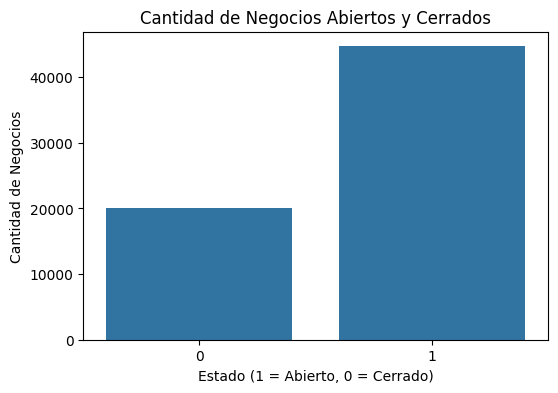

In [ ]:
# Histograma de la columna is_open

plt.figure(figsize=(6, 4))
sns.countplot(data=df_business, x='is_open')
plt.title('Cantidad de Negocios Abiertos y Cerrados')
plt.xlabel('Estado (1 = Abierto, 0 = Cerrado)')
plt.ylabel('Cantidad de Negocios')
plt.show()

La mayoría de los negocios en el dataset están abiertos, representando más de $120,000$ ($80\%$) entradas.

Una cantidad menor, aproximadamente $30,000$ ($20\%$) negocios, están cerrados.


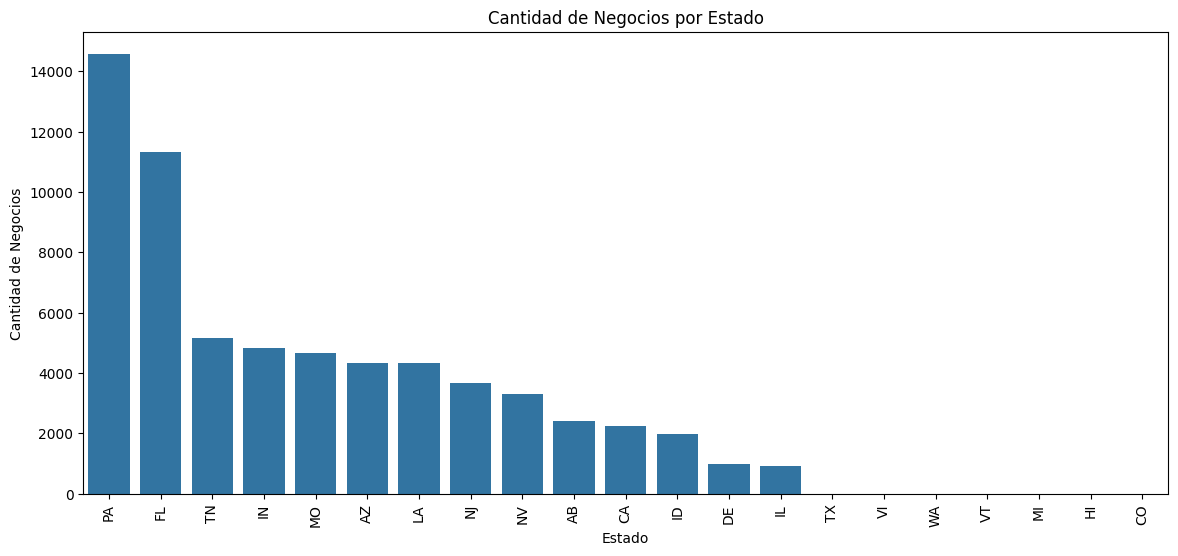

In [ ]:
# Conteo de negocios por estado

plt.figure(figsize=(14, 6))
sns.countplot(data=df_business, x='state', order=df_business['state'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Cantidad de Negocios por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Negocios')
plt.show()

- Se aprecia que PA (Pensilvania) y FL (Florida) tienen la mayor cantidad de negocios, con Pensilvania en primer lugar, alcanzando aproximadamente $35,000$ negocios, y Florida con alrededor de $25,000$.

- La cantidad de negocios disminuye significativamente después de los primeros dos estados. Estados como TN (Tennessee), IN (Indiana), y MO (Misuri) tienen también una representación considerable, pero bastante menor que los estados principales.

- A partir de la mitad de la gráfica, el número de negocios por estado se reduce aún más. Los estados al final del gráfico tienen menos de $2,000$ negocios registrados cada uno, lo cual indica una menor densidad de negocios en esos lugares.

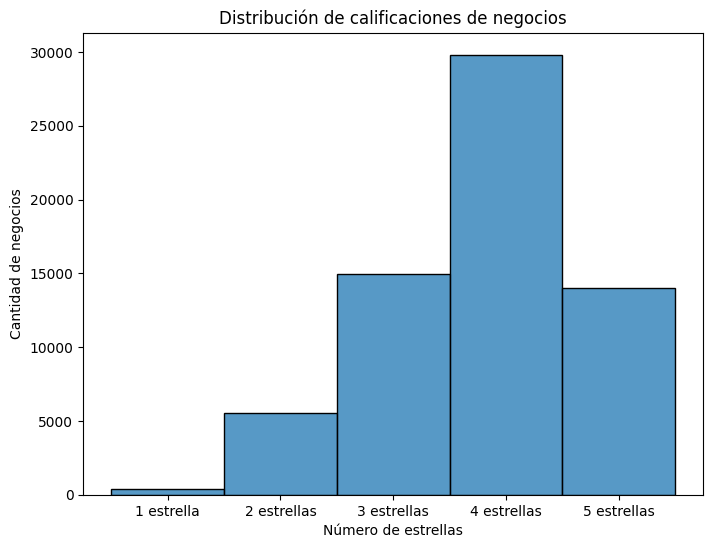

In [ ]:
# Histograma de la columna 'stars'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_business, x='stars', bins=5, discrete=True)
plt.title('Distribución de calificaciones de negocios')
plt.xlabel('Número de estrellas')
plt.ylabel('Cantidad de negocios')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=['1 estrella', '2 estrellas', '3 estrellas', '4 estrellas', '5 estrellas'])
plt.show()

Este histograma muestra la distribución de calificaciones de negocios en función de su puntuación en estrellas, de $1$ a $5$.

- Se puede apreciar que la tendencia del gráfico es ascendente a partir de 1 estrella hasta 4 estrellas, y luego desciende ligeramente en 5 estrellas. Esto indica una tendencia positiva en las calificaciones de los negocios, lo que podría ser reflejo de la satisfacción general de los usuarios con estos establecimientos.

- La mayor cantidad de negocios tienen una calificación de $4$ estrellas, lo que sugiere que la mayoría de los negocios reciben una valoración positiva de los usuarios, pero no la máxima.

- La segunda categoría más común es la de $5$ estrellas. Esto indica que un número considerable de negocios logra una calificación excelente, aunque son menos que los que obtienen $4$ estrellas.

- Las calificaciones de $3$ estrellas son relativamente frecuentes, pero mucho menos que las de $4$ y $5$ estrellas. En contraste, las de $2$ estrellas son pocas, y las de $1$ estrella son mínimas, lo que refleja que la mayoría de los negocios reciben buenas calificaciones.



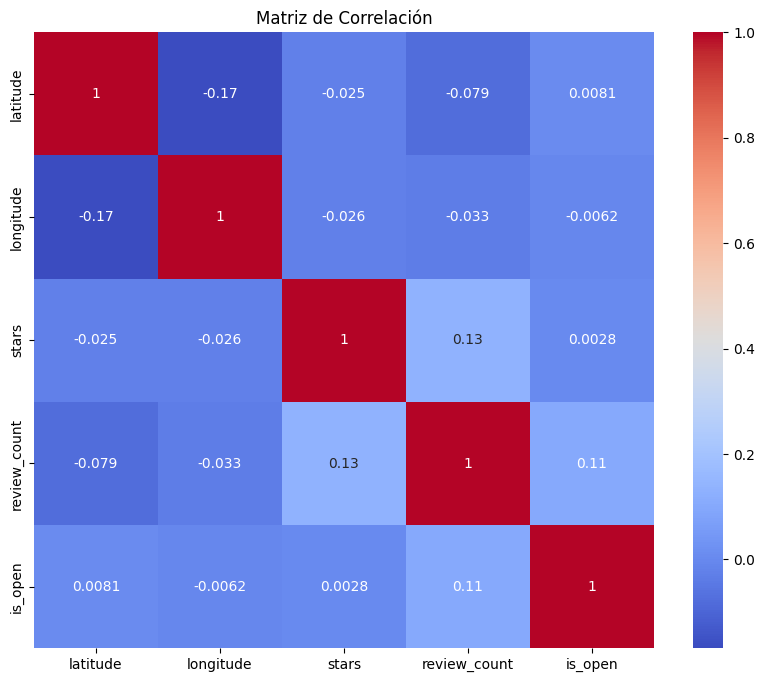

In [ ]:
# Matriz de correlación (para variables numéricas)

# Seleccionar solo las columnas numéricas
numeric_cols = df_business.select_dtypes(include=['number'])

# Calcular la matriz de correlación
corr_matrix = numeric_cols.corr()

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Las correlaciones en esta matriz son muy bajas, lo que indica que no existen relaciones fuertes entre las variables numéricas en este dataset. Se puede infererir que cada una de estas variables opera de manera bastante independiente dentro del conjunto de datos, al menos en términos de correlación lineal.

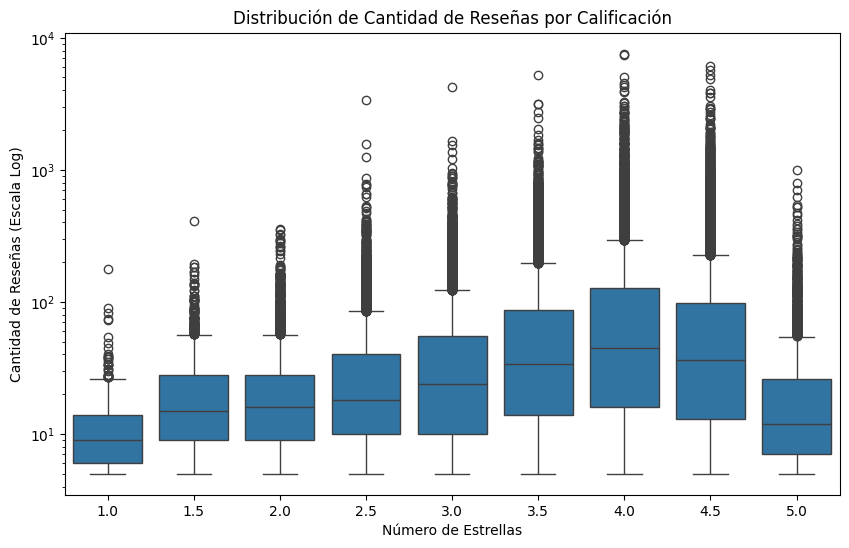

In [ ]:
# Boxplot de review_count por estrellas

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_business, x='stars', y='review_count')
plt.yscale('log')  # Escala logarítmica para ver mejor los datos
plt.title('Distribución de Cantidad de Reseñas por Calificación')
plt.xlabel('Número de Estrellas')
plt.ylabel('Cantidad de Reseñas (Escala Log)')
plt.show()

- Para cada calificación, la mediana de la cantidad de reseñas (línea central de cada caja) es relativamente baja, lo que sugiere que la mayoría de los negocios tienen un número moderado de reseñas. Esto puede deberse a que solo algunos negocios reciben una gran cantidad de reseñas, mientras que la mayoría tiene una cantidad mucho menor.

- Las cajas (rango intercuartílico) de cada calificación son bastante similares, lo que indica que la cantidad de reseñas no varía drásticamente en función de la calificación. Negocios con calificaciones de $1$ estrella y $5$ estrellas, por ejemplo, pueden tener un rango de reseñas comparable.

- Existen numerosos outliers en todas las calificaciones, especialmente en los niveles de $4$ y $5$ estrellas. Estos outliers representan negocios con una cantidad significativamente mayor de reseñas que el promedio. Esto puede indicar negocios populares o muy bien establecidos que reciben una mayor atención de los clientes.

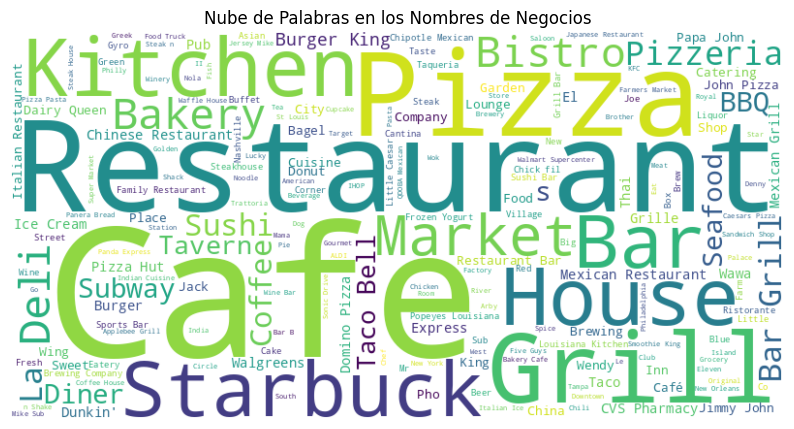

In [ ]:
# Nube de Palabras para name o categories

# Se unen todas las palabras en 'name' o 'categories'
text = " ".join(name for name in df_business['name'].dropna())

# Se genera la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras en los Nombres de Negocios')
plt.show()

Palabras como "Cafe," "Restaurant," "Bar," "Pizza," "Grill," "Deli," y "Bistro" son algunas de las más destacadas. Esto indica que una gran parte de los negocios en el dataset pertenece al sector de alimentos y bebidas. La presencia de estos términos permite inferir una alta densidad de negocios relacionados con el consumo de comida y bebida.

In [ ]:
# Frecuencia de cada ciudad
print(df_business['city'].value_counts())

city
Philadelphia         7085
Tampa                3675
Indianapolis         3486
Tucson               3118
Nashville            3054
                     ... 
MEDIA                   1
Festerville             1
erdenheim               1
Bensalem Township       1
Algiers                 1
Name: count, Length: 1001, dtype: int64


In [ ]:
# Contar el número de ciudades únicas
num_cities = df_business['city'].nunique()
print("Número de ciudades únicas:", num_cities)

Número de ciudades únicas: 1001


In [ ]:
# Visualizar las 10 ciudades más comunes (ajusta el número si es necesario)
top_cities = df_business['city'].value_counts().head(10)
print(top_cities)

city
Philadelphia     7085
Tampa            3675
Indianapolis     3486
Tucson           3118
Nashville        3054
New Orleans      2810
Edmonton         2667
Saint Louis      2111
Reno             1730
Santa Barbara    1083
Name: count, dtype: int64


##**3.2. Tabla `Checkin`**

In [ ]:
# Tipo de datos por Columna
print(df_checkin.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63353 entries, 0 to 63352
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         63353 non-null  object
 1   business_id  63353 non-null  object
dtypes: object(2)
memory usage: 990.0+ KB
None


Primero, se va a convertir la columna date de texto a un tipo de datos de fecha (`datetime`)

In [ ]:
# Muestra los primeros valores originales de 'date' para verificar el formato exacto
print(df_checkin['date'].head(20))


0     2010-01-30 21:15:51, 2010-02-27 21:48:38, 2010...
1     2010-07-14 06:53:20, 2010-11-23 18:36:42, 2011...
2     2010-04-11 03:52:07, 2010-05-18 03:52:31, 2010...
3     2013-03-28 20:46:16, 2013-04-20 17:43:46, 2013...
4     2010-06-26 21:15:47, 2010-07-26 17:31:19, 2010...
5     2015-12-29 03:29:08, 2016-05-15 20:09:43, 2016...
6     2010-11-28 22:00:40, 2010-11-28 22:01:38, 2011...
7                                   2012-09-05 19:12:40
8     2015-06-09 02:31:29, 2015-06-09 03:30:31, 2015...
9     2017-01-31 22:01:46, 2017-02-24 20:49:00, 2017...
10    2012-07-03 14:57:23, 2012-09-30 13:09:53, 2012...
11    2011-06-10 18:16:36, 2012-07-28 21:19:10, 2013...
12    2020-07-25 02:44:59, 2020-07-27 21:17:32, 2020...
13    2011-02-01 23:20:11, 2011-05-19 18:16:16, 2011...
14    2011-01-07 17:57:39, 2011-03-13 23:07:39, 2011...
15    2011-02-06 16:46:15, 2011-02-19 03:42:49, 2011...
16    2015-02-07 14:48:47, 2015-02-07 16:37:06, 2015...
17    2015-01-10 14:58:13, 2015-01-12 04:32:55, 

In [ ]:
# Asegura que todos los valores en 'date' sean cadenas, reemplazando NaN o valores no válidos
df_checkin['date'] = df_checkin['date'].astype(str)

# Expande las fechas en filas individuales
df_checkin = df_checkin.assign(date=df_checkin['date'].str.split(',')).explode('date')

# Elimina espacios en blanco adicionales al inicio o final de cada fecha
df_checkin['date'] = df_checkin['date'].str.strip()

# Convierte las fechas al tipo datetime
df_checkin['date'] = pd.to_datetime(df_checkin['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [ ]:
# Verificación de la conversión
print(df_checkin.info())
print(df_checkin.head())

<class 'pandas.core.frame.DataFrame'>
Index: 9956658 entries, 0 to 63352
Data columns (total 2 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   business_id  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 227.9+ MB
None
                 date             business_id
0 2010-01-30 21:15:51  6O-tfW_X05KbYfF3sDRPIQ
0 2010-02-27 21:48:38  6O-tfW_X05KbYfF3sDRPIQ
0 2010-02-27 21:48:57  6O-tfW_X05KbYfF3sDRPIQ
0 2010-07-11 18:03:30  6O-tfW_X05KbYfF3sDRPIQ
0 2010-07-31 17:49:10  6O-tfW_X05KbYfF3sDRPIQ


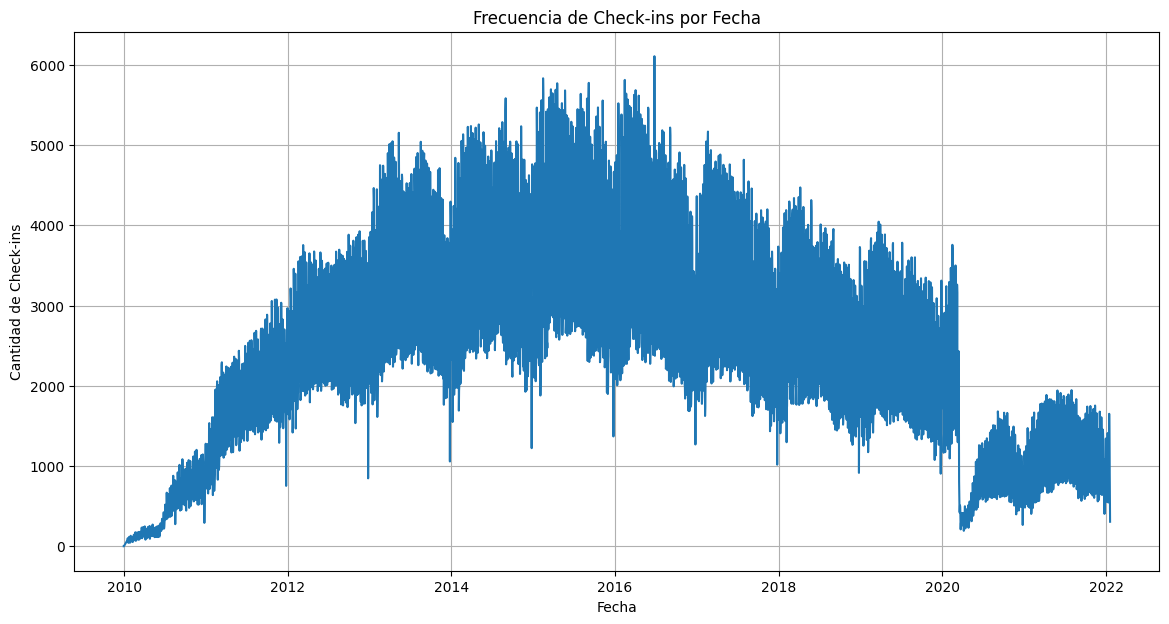

In [ ]:
# Conteo de check-ins por fecha
checkins_by_date = df_checkin['date'].dt.date.value_counts().sort_index()

# Gráfico de la frecuencia de check-ins por fecha
plt.figure(figsize=(14, 7))
checkins_by_date.plot()
plt.title('Frecuencia de Check-ins por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Check-ins')
plt.grid(True)
plt.show()

- Desde 2010 hasta aproximadamente 2014, se observa un crecimiento sostenido en la cantidad de check-ins, indicando posiblemente una fase de adopción o popularidad creciente en el uso de esta función o aplicación.

- Entre 2014 y 2019, la cantidad de check-ins parece mantenerse alta, aunque con variaciones diarias considerables. Este periodo refleja un pico sostenido de actividad, con puntos de máxima frecuencia que superan los 5000 check-ins diarios en algunos momentos.

- Se nota una disminución notable en la cantidad de check-ins desde inicios de 2020. Esto coincide con la pandemia de COVID-19, lo que podría haber afectado las actividades presenciales y, por ende, la frecuencia de check-ins en muchos lugares.

- Desde 2021 en adelante, se observa un repunte en la actividad de check-ins, aunque sin alcanzar los niveles máximos previos a 2020. Esto sugiere una posible recuperación parcial, pero sin volver al pico de actividad previo a la pandemia.

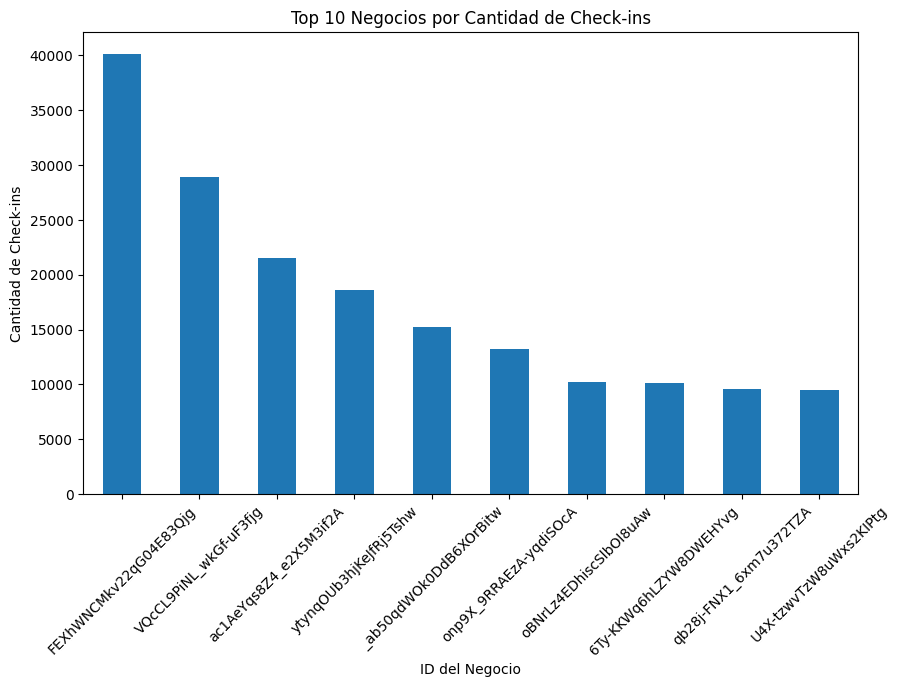

In [ ]:
# Conteo de check-ins por cada negocio
checkins_by_business = df_checkin['business_id'].value_counts()

# Visualización de los 10 negocios con más check-ins
plt.figure(figsize=(10, 6))
checkins_by_business.head(10).plot(kind='bar')
plt.title('Top 10 Negocios por Cantidad de Check-ins')
plt.xlabel('ID del Negocio')
plt.ylabel('Cantidad de Check-ins')
plt.xticks(rotation=45)
plt.show()


- primer negocio tiene aproximadamente $40,000$ check-ins, lo que lo coloca muy por encima de los demás en términos de popularidad o frecuencia de visitas. Esto podría indicar un lugar de alto tráfico o un negocio especialmente atractivo.

- Hay una disminución progresiva en la cantidad de check-ins conforme se desciende en el listado, aunque los primeros tres negocios muestran un nivel considerablemente superior al resto.

- El negocio con menor cantidad de check-ins dentro del top 10 tiene aproximadamente la mitad de los check-ins que el primero, lo que resalta una concentración de actividad en los primeros lugares.

- Dado que solo se presentan los IDs de los negocios y no sus nombres, no se puede determinar el tipo de establecimiento o ubicación, pero la información podría ser útil para identificar patrones de popularidad si se combinara con otros datos.

<ipython-input-52-c7785172974b>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  checkins_monthly = df_checkin.set_index('date').resample('M').size()


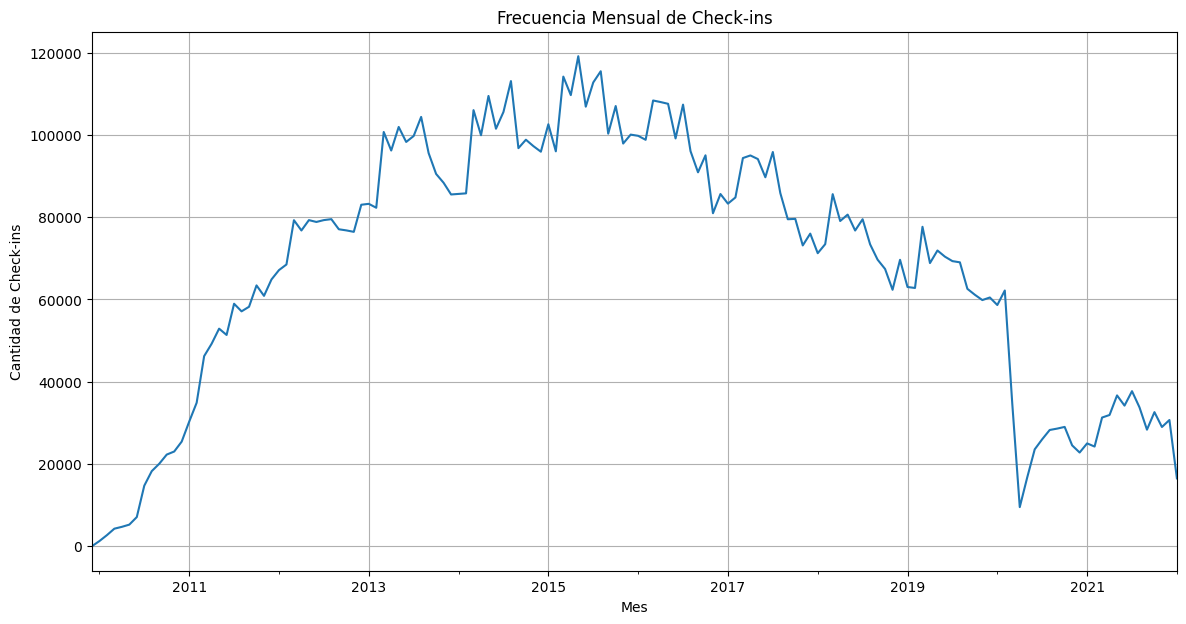

In [ ]:
# Agrupación por mes
checkins_monthly = df_checkin.set_index('date').resample('M').size()

# Gráfico del número de check-ins por mes
plt.figure(figsize=(14, 7))
checkins_monthly.plot()
plt.title('Frecuencia Mensual de Check-ins')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Check-ins')
plt.grid(True)
plt.show()


- Desde 2010 hasta 2013, la frecuencia de check-ins crece de manera sostenida y significativa, alcanzando un pico cercano a los $120,000$ check-ins mensuales. Esto indica un período de adopción o crecimiento en la popularidad de esta actividad o plataforma.

- Entre 2013 y 2017, la cantidad de check-ins mensuales permanece en niveles altos, aunque con algunas fluctuaciones, manteniéndose en un rango que va desde $80,000$ hasta un poco más de 100,000 check-ins mensuales. Este periodo parece ser una fase de estabilidad y consolidación.

- A partir de 2018, la cantidad de check-ins comienza a disminuir gradualmente. Esta tendencia continúa de forma marcada hacia 2020.

- En 2020, se observa una caída pronunciada en la frecuencia de check-ins, cayendo a valores por debajo de los 20,000 check-ins mensuales. Esto es consistente con el impacto de la pandemia de COVID-19, que redujo drásticamente las interacciones y actividades en sitios físicos.

- Desde finales de 2020 hasta 2022, hay una ligera recuperación en los check-ins, pero sin alcanzar los niveles previos a la pandemia. Esto podría sugerir una adaptación o retorno parcial a la actividad normal, aunque probablemente con restricciones o cambios en el comportamiento de los usuarios.

In [ ]:
# Cruce entre df_checkin y df_business
df_checkin_business = df_checkin.merge(df_business, on='business_id', how='left')

# Verifica el resultado del cruce
print(df_checkin_business.info())
print(df_checkin_business.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9956658 entries, 0 to 9956657
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   business_id   object        
 2   name          object        
 3   address       object        
 4   city          object        
 5   state         object        
 6   postal_code   object        
 7   latitude      float64       
 8   longitude     float64       
 9   stars         float64       
 10  review_count  Int64         
 11  is_open       Int64         
 12  attributes    object        
 13  categories    object        
 14  hours         object        
dtypes: Int64(2), datetime64[ns](1), float64(3), object(9)
memory usage: 1.1+ GB
None
                 date             business_id  \
0 2010-01-30 21:15:51  6O-tfW_X05KbYfF3sDRPIQ   
1 2010-02-27 21:48:38  6O-tfW_X05KbYfF3sDRPIQ   
2 2010-02-27 21:48:57  6O-tfW_X05KbYfF3sDRPIQ   
3 2010-07-11 18:03:30  6O-t

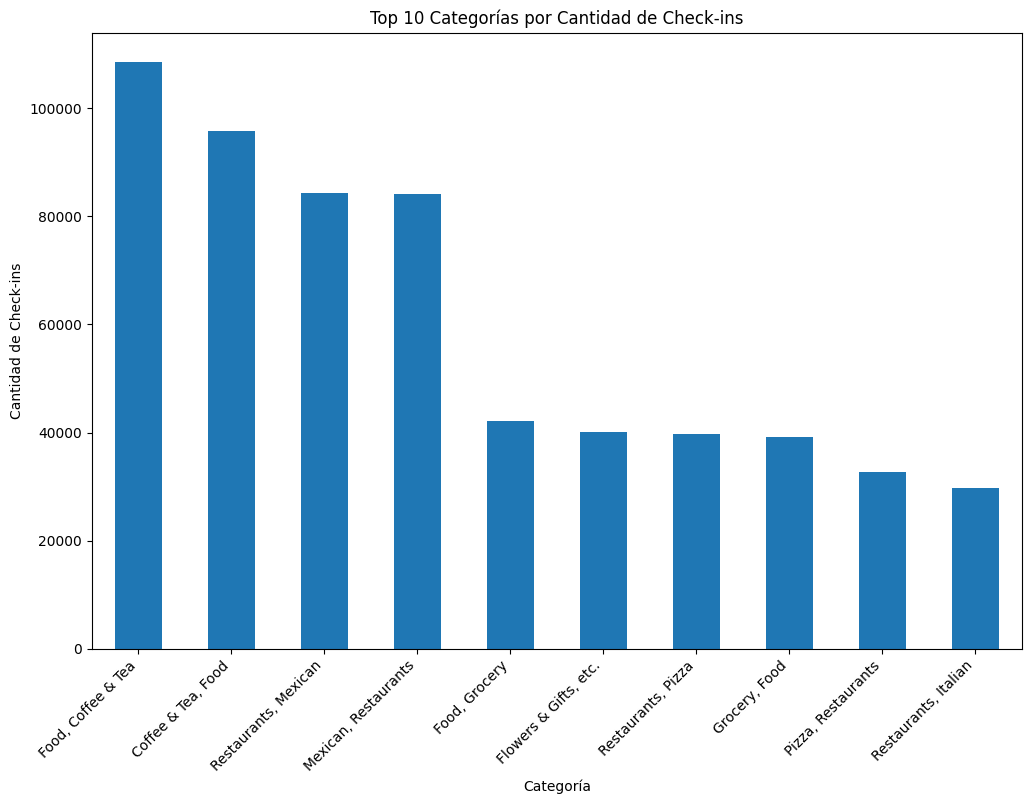

In [ ]:
# Conteo de check-ins por categoría
checkins_by_category = df_checkin_business['categories'].value_counts()

# Se renombran categorías largas
checkins_by_category_shortened = checkins_by_category.head(10).rename(index={
    'Flowers & Gifts, Gift Shops, Cafes, Restaurants, Coffee & Tea, Donuts, Food, Souvenir Shops, Shopping': 'Flowers & Gifts, etc.'
})

# Visualización de las categorías más populares
plt.figure(figsize=(12, 8))
checkins_by_category_shortened.plot(kind='bar')
plt.title('Top 10 Categorías por Cantidad de Check-ins')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Check-ins')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()



- Las categorías relacionadas con alimentos y bebidas, como "Food, Coffee & Tea" y "Coffee & Tea, Food", ocupan los primeros lugares, cada una con más de 90,000 check-ins. Esto refleja una fuerte preferencia de los usuarios por estos lugares, posiblemente debido a su frecuencia de visita y la tendencia de hacer check-ins en cafeterías y restaurantes.

- Entre las categorías destacadas se encuentran varios tipos específicos de restaurantes, como "Mexican Restaurants" y "Italian Restaurants". Esto sugiere que los usuarios hacen check-ins en una variedad de establecimientos culinarios, mostrando interés en distintos tipos de cocina.

- La categoría "Food, Grocery" y la más general "Flowers & Gifts, etc." también tienen una gran cantidad de check-ins, indicando que los usuarios también visitan con frecuencia supermercados y tiendas de regalos.

- La categoría de "Restaurants, Pizza" también figura entre las más populares, lo que sugiere que lugares de comida rápida o de consumo inmediato son populares para hacer check-ins.

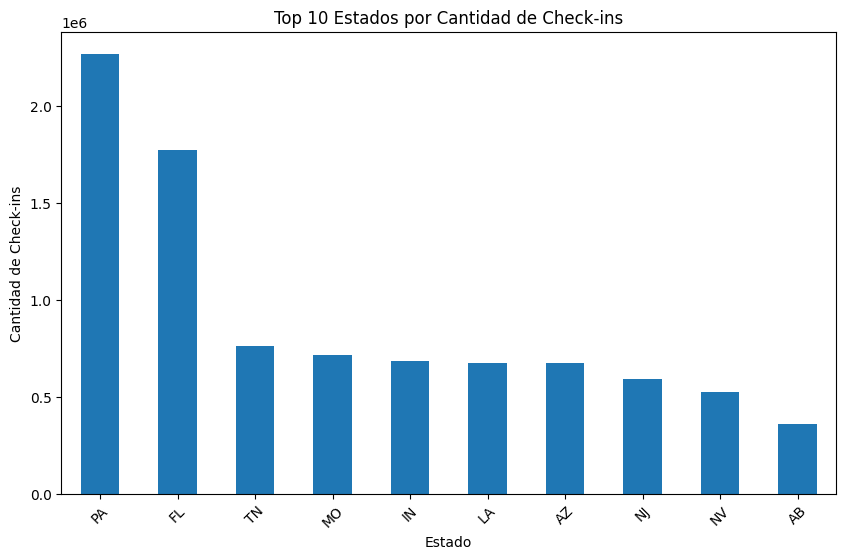

In [ ]:
# Conteo de check-ins por estado
checkins_by_state = df_checkin_business['state'].value_counts()

# Visualización de los estados con más check-ins
plt.figure(figsize=(10, 6))
checkins_by_state.head(10).plot(kind='bar')
plt.title('Top 10 Estados por Cantidad de Check-ins')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Check-ins')
plt.xticks(rotation=45)
plt.show()

- Los estados de Pensilvania (PA) y Florida (FL) están significativamente por encima de los demás en términos de check-ins, con más de 1.5 millones y alrededor de 2 millones respectivamente. Esta diferencia sugiere que en estos estados se encuentran áreas o ciudades con alta densidad de negocios o lugares que los usuarios frecuentan.

- Después de PA y FL, los demás estados presentan cantidades similares de check-ins, alrededor de 0.5 millones cada uno. Esto sugiere que, aunque son populares, no tienen la misma intensidad de check-ins que los dos principales.

- Los estados representados abarcan diferentes regiones de Estados Unidos, como el sur (FL, LA), el medio oeste (IN, MO), y el oeste (AZ, NV), lo que indica una distribución geográfica diversa de la actividad de check-ins.

- Llama la atención la inclusión de Alberta (AB), que es una provincia de Canadá, en esta lista. Esto sugiere que esta base de datos o la aplicación también tiene un alcance internacional, y que Alberta podría ser una región de alta actividad dentro del contexto canadiense.

##**3.3. Tabla `restaurante`**

In [ ]:
# Tipo de datos por Columna
print(df_restaurante.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210953 entries, 0 to 210952
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   gmap_id         210953 non-null  object 
 1   avg_rating      210953 non-null  float64
 2   category        210953 non-null  object 
 3   latitude        210953 non-null  float64
 4   longitude       210953 non-null  float64
 5   name            210953 non-null  object 
 6   num_of_reviews  210953 non-null  Int64  
 7   extra           210953 non-null  object 
dtypes: Int64(1), float64(3), object(4)
memory usage: 13.1+ MB
None


In [ ]:
# Dimensiones del DataFrame
dimensiones = df_restaurante.shape

In [ ]:
# Tipos de datos y revisión general
tipos_datos = df_restaurante.dtypes
resumen_nulos = df_restaurante.isnull().sum()
duplicados = df_restaurante.duplicated().sum()

In [ ]:
# Mostrar resultados
{
    "Dimensiones": dimensiones,
    "Tipos de datos": tipos_datos,
    "Valores nulos por columna": resumen_nulos,
    "Filas duplicadas": duplicados
}

{'Dimensiones': (210953, 8),
 'Tipos de datos': gmap_id            object
 avg_rating        float64
 category           object
 latitude          float64
 longitude         float64
 name               object
 num_of_reviews      Int64
 extra              object
 dtype: object,
 'Valores nulos por columna': gmap_id           0
 avg_rating        0
 category          0
 latitude          0
 longitude         0
 name              0
 num_of_reviews    0
 extra             0
 dtype: int64,
 'Filas duplicadas': 0}

In [ ]:
print("Resumen estadístico:\n", df_restaurante.describe())

Resumen estadístico:
           avg_rating       latitude      longitude  num_of_reviews
count  210953.000000  210953.000000  210953.000000        210953.0
mean        4.157181      37.346322     -92.085787      112.788256
std         0.574752       5.367734      17.300075      297.356123
min         1.000000      19.060045    -177.378634             1.0
25%         3.900000      33.758537    -100.448611            18.0
50%         4.300000      38.414008     -87.190918            44.0
75%         4.600000      41.023556     -78.435783            97.0
max         5.000000      71.292018     180.000000          9998.0


**avg_rating (Calificación promedio)**

- **Promedio:** $4.16$, esto indica una tendencia hacia calificaciones positivas.

- **Desviación estándar:** $0.57$, se observa poca dispersión, por lo que las calificaciones están concentradas cerca del promedio.

- **Rango:** va de $1.0$ a $5.0$, cubriendo toda la escala de calificaciones.

- **Percentiles:**

  - El 25% de las calificaciones es menor o igual a 3.9.

  - El 50% (mediana) es $4.3$, indicando que más de la mitad tienen una calificación alta.

  - El 75% alcanza $4.6$, lo que refuerza que la mayoría tiene calificaciones buenas o excelentes.

num_of_reviews (Número de reseñas)

- **Promedio** $112.79$ reseñas por entrada.

- **Desviación estándar:** $297.36$, indicando una alta variabilidad en la cantidad de reseñas.

- **Rango:** de $1$ a $9998$, lo que evidencia que algunas entradas tienen un volumen desproporcionado de reseñas en comparación con otras.

- **Percentiles:**

  - El 25% tiene 18 reseñas o menos.

  - La mediana (50%) tiene 44 reseñas, indicando que la mayoría tienen un volumen moderado.

  - El 75% tiene 97 o menos, mostrando que solo una pequeña fracción tiene más de 100 reseñas.

**Visualización la distribución de las calificaciones promedio**

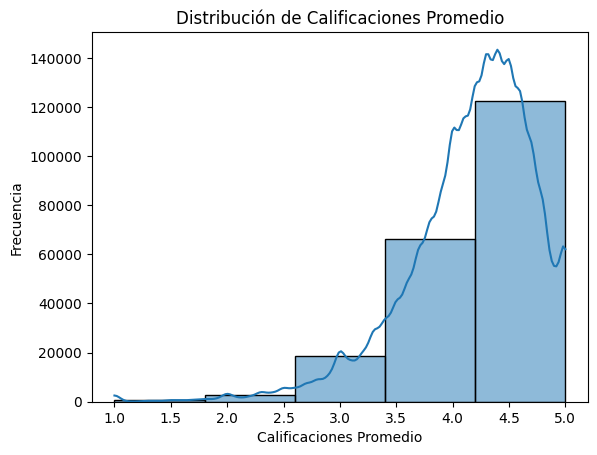

In [ ]:
sns.histplot(df_restaurante['avg_rating'], bins=5, kde=True)
plt.title("Distribución de Calificaciones Promedio")
plt.xlabel("Calificaciones Promedio")
plt.ylabel("Frecuencia")
plt.show()

- La mayoría de las calificaciones promedio se concentran entre $4.0$ y $4.5$, lo cual indica una tendencia positiva en las evaluaciones. Es poco común encontrar restaurantes con calificaciones promedio bajas.

- La distribución está sesgada hacia la derecha, es decir, la mayoría de las calificaciones están en el extremo superior (más cercano a $5.0$). Esto sugiere que los clientes suelen evaluar positivamente, y que es menos frecuente que los restaurantes reciban calificaciones bajas.

- Hay un pico de frecuencia alrededor de $4.5$, lo cual refuerza que muchos restaurantes obtienen una calificación alta y que los clientes suelen dejar reseñas favorables.

- Las calificaciones menores a $3.0$ son muy poco frecuentes. Esto puede significar que los restaurantes con calificaciones muy bajas son menos comunes o que, en general, la calidad del servicio y la comida es buena, según la percepción de los usuarios.

- Aunque muchas calificaciones están entre $4.0$ y $5.0$, hay cierta variabilidad en este rango, con una caída gradual de la frecuencia a medida que nos acercamos al $5.0$. Esto podría reflejar ligeras diferencias en la satisfacción de los clientes, pero dentro de un nivel alto.

**Visualización de la distribución del número de reseñas**

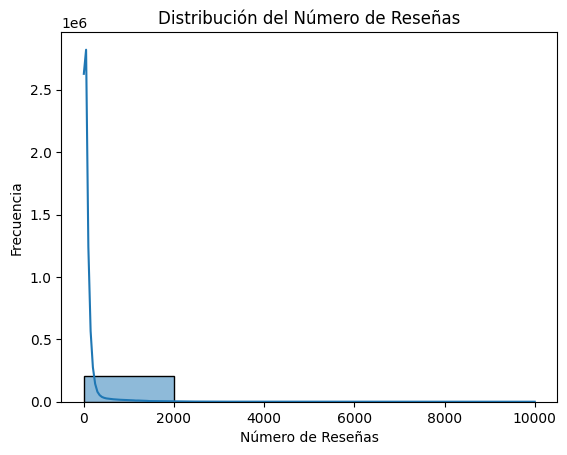

In [ ]:
sns.histplot(df_restaurante['num_of_reviews'], bins=5, kde=True)
plt.title("Distribución del Número de Reseñas")
plt.xlabel("Número de Reseñas")
plt.ylabel("Frecuencia")
plt.show()

- La mayor parte de los restaurantes tienen un número bajo de reseñas, mientras que unos pocos acumulan una cantidad muy elevada. Esto es evidente por el fuerte pico en las frecuencias más cercanas a cero y una rápida disminución hacia la derecha.

- La gran mayoría de los restaurantes tienen menos de $1000$ reseñas, y la frecuencia disminuye casi exponencialmente conforme aumenta el número de reseñas. Esto sugiere que la mayoría de los restaurantes reciben poca atención en comparación con unos pocos que son extremadamente populares.

- Aunque es difícil de ver con claridad en esta escala, algunos puntos aislados a la derecha indican que ciertos restaurantes han recibido miles de reseñas, probablemente debido a una popularidad o visibilidad significativamente mayor.

**Análisis de categorías**

In [ ]:
print("Frecuencia de Categorías:\n", df_restaurante['category'].value_counts())

Frecuencia de Categorías:
 category
Restaurant                                                                                                                                                                                               39259
Mexican restaurant                                                                                                                                                                                        9599
Sandwich shop, Caterer, Fast food restaurant, Takeout Restaurant, Restaurant                                                                                                                              7907
Pizza restaurant                                                                                                                                                                                          6597
Chinese restaurant                                                                                                                      

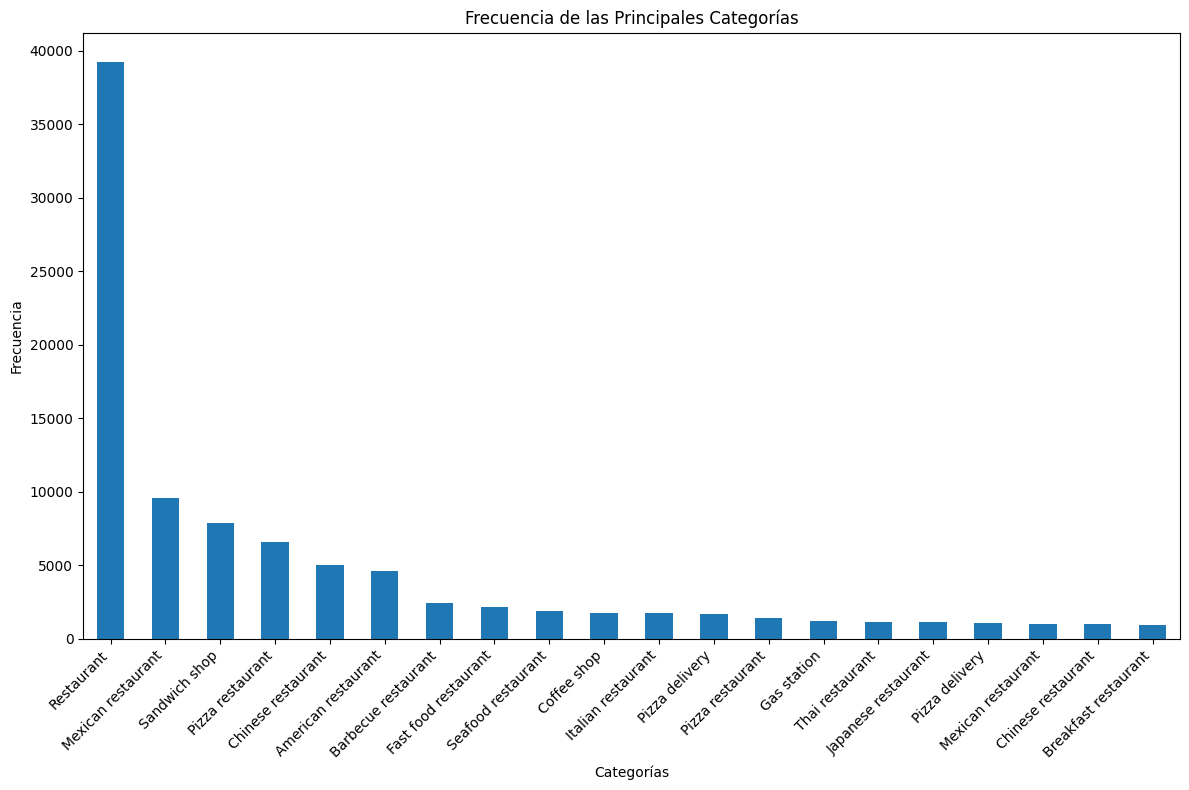

In [ ]:
# Simplificar categorías tomando solo la primera palabra
top_categories = df_restaurante['category'].value_counts().head(20)
top_categories.index = top_categories.index.str.split(', ').str[0]  # Toma solo la primera palabra de cada categoría

plt.figure(figsize=(12, 8))
top_categories.plot(kind='bar')
plt.title('Frecuencia de las Principales Categorías')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- La categoría general `Restaurant` es, con mucha diferencia, la más frecuente, con casi $40,000$ registros. Esto sugiere que una gran cantidad de establecimientos se clasifica simplemente como "restaurante" sin especificar un tipo particular de cocina o servicio, lo cual puede reflejar una amplia variedad de opciones o falta de precisión en la categorización.

- Después de la categoría general, las categorías más comunes son `Mexican restaurant` y `Sandwich Shop`, seguidas por `Pizza restaurant` y `Chinese restaurant`. Esto indica que hay una alta demanda o popularidad de estos tipos de cocina, posiblemente reflejando una combinación de gustos del consumidor y la oferta del mercado.

- Si bien las categorías superiores representan cocinas populares, la distribución incluye una variedad de tipos de cocina, como `American restaurant`, `Barbecue restaurant`, `Seafood restaurant`, e `Italian restaurant`. Esto apunta a una diversidad en las opciones de comida disponibles y en la especialización de los restaurantes.

- Este tipo de distribución puede también reflejar las preferencias culturales o regionales, donde ciertos tipos de cocina, como la mexicana o la comida rápida (representada por "Sandwich Shop"), tienen una mayor aceptación o presencia. Para quienes buscan invertir o analizar el mercado, podría haber oportunidades en las categorías menos comunes si hay una demanda insatisfecha o una tendencia creciente hacia esos tipos de comida.

**Análisis geoespacial**

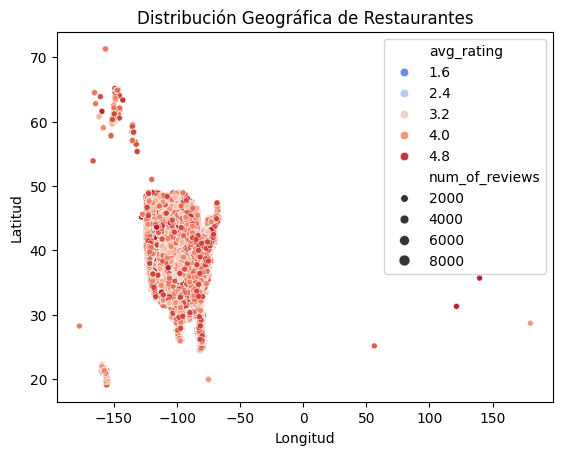

In [ ]:
# Conversión de columnas relevantes a tipos estándar
df_restaurante['latitude'] = df_restaurante['latitude'].astype(float)
df_restaurante['longitude'] = df_restaurante['longitude'].astype(float)
df_restaurante['num_of_reviews'] = df_restaurante['num_of_reviews'].astype(int)
df_restaurante['avg_rating'] = df_restaurante['avg_rating'].astype(float)

# Gráfico de dispersión
sns.scatterplot(
    x=df_restaurante['longitude'],
    y=df_restaurante['latitude'],
    size=df_restaurante['num_of_reviews'],
    hue=df_restaurante['avg_rating'],
    palette="coolwarm"
)
plt.title("Distribución Geográfica de Restaurantes")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()


- La mayor parte de los puntos están ubicados en la zona de América del Norte, lo cual se sabía al momento de obtener el dataset. La concentración más densa se encuentra entre las longitudes -125 y -70, y las latitudes 20 a 50, coincidiendo con los Estados Unidos.

- Los puntos están en una escala de color que va del azul (calificaciones más bajas) al rojo (calificaciones más altas).
La mayoría de los puntos están en tonos rojos o rosados, lo que indica que la mayoría de los restaurantes tienen calificaciones relativamente altas (cercanas a $4.0$ o más).
Hay pocos puntos en azul claro, lo que muestra que las calificaciones muy bajas son poco comunes en esta muestra.

- El tamaño de los puntos refleja la cantidad de reseñas, con los puntos más grandes representando restaurantes con un mayor número de reseñas. Se observa que la mayoría de los puntos son de tamaño pequeño a mediano, lo cual indica que la mayoría de los restaurantes tienen una cantidad moderada de reseñas.
Algunos puntos de tamaño grande indican que unos pocos restaurantes destacan con una cantidad significativa de reseñas, posiblemente debido a su popularidad o ubicación en áreas de alta demanda.

Aunque hay puntos dispersos fuera de Norteamérica, estos son mucho menos frecuentes. Esto podría representar restaurantes en lugares más aislados o fuera del ámbito principal del dataset.

La falta de puntos en algunas zonas indica áreas sin cobertura de datos o sin presencia de restaurantes según este conjunto de datos.

**Análisis de cómo se relacionan las calificaciones promedio y el número de reseñas**

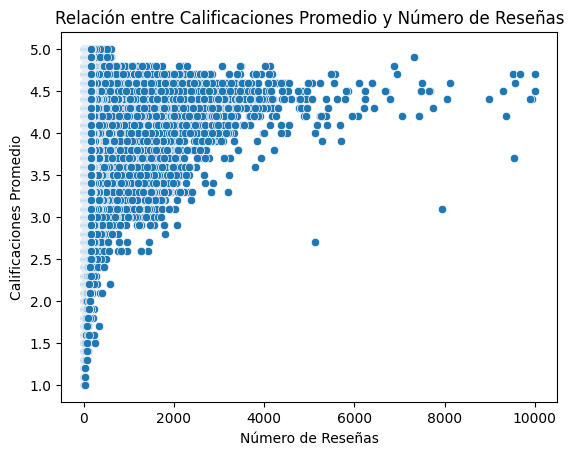

In [ ]:
sns.scatterplot(
    x=df_restaurante['num_of_reviews'],
    y=df_restaurante['avg_rating']
)
plt.title("Relación entre Calificaciones Promedio y Número de Reseñas")
plt.xlabel("Número de Reseñas")
plt.ylabel("Calificaciones Promedio")
plt.show()

- La mayoría de los puntos están concentrados en el rango de pocas reseñas (cercano a cero en el eje x). Esta agrupación vertical indica que un gran número de restaurantes tienen pocas reseñas, pero la variabilidad en las calificaciones promedio es amplia (desde 1.0 hasta 5.0).

- A medida que el número de reseñas aumenta, parece haber una leve tendencia a la concentración de calificaciones entre 4.0 y 4.5, sugiriendo que los restaurantes con muchas reseñas suelen tener buenas calificaciones. Sin embargo, no hay una correlación clara entre el número de reseñas y las calificaciones promedio; en otras palabras, un mayor número de reseñas no garantiza una mejor calificación.

- Se observa algunos puntos dispersos hacia la derecha del gráfico, representando restaurantes con un número extremadamente alto de reseñas (varios miles, hasta $10,000$).
Estos puntos tienden a tener calificaciones en el rango medio-alto (principalmente entre $3.5$ y $5.0$), lo que podría indicar que los restaurantes populares o muy visitados tienden a mantener una buena calificación, aunque algunos pueden tener calificaciones más bajas.

- Hay pocos puntos con calificaciones promedio bajas (por debajo de $2.0$), y estos están principalmente entre los restaurantes con menos reseñas. Esto sugiere que los establecimientos con pocas reseñas pueden tener más variabilidad en la percepción de los clientes.

##**3.4. Tabla `review`**

In [ ]:
# Información general del DataFrame
print(df_review.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    100000 non-null  object 
 1   user_id      100000 non-null  object 
 2   business_id  100000 non-null  object 
 3   stars        100000 non-null  float64
 4   useful       100000 non-null  Int64  
 5   funny        100000 non-null  Int64  
 6   cool         100000 non-null  Int64  
 7   text         100000 non-null  object 
 8   date         100000 non-null  object 
 9   sentimiento  0 non-null       float64
dtypes: Int64(3), float64(2), object(5)
memory usage: 7.9+ MB
None


In [ ]:
# Estadísticas descriptivas
print(df_review.describe())

               stars    useful     funny      cool  sentimiento
count  100000.000000  100000.0  100000.0  100000.0          0.0
mean        3.790060   0.79636   0.21625    0.3131          NaN
std         1.397807  1.865375   1.20199  0.707908          NaN
min         1.000000       0.0       0.0       0.0          NaN
25%         3.000000       0.0       0.0       0.0          NaN
50%         4.000000       0.0       0.0       0.0          NaN
75%         5.000000       1.0       0.0       0.0          NaN
max         5.000000     318.0     307.0       6.0          NaN


**Columna `stars`**

- El promedio es $3.8$, lo que sugiere una ligera tendencia hacia reseñas positivas.

- La mediana es 4, lo que confirma que la mayoría de las reseñas son buenas.

- La desviación estándar es $1.39$, lo que muestra una variación moderada en las calificaciones.

- El 25% de las reseñas tienen $3$ estrellas o menos y el 75% tienen $4$ estrellas o más, con muchas alcanzando $5$ estrellas.

**Columna `useful`**

- La media e $0.86$, lo que indica que la mayoría de las reseñas no reciben muchos votos útiles.

- La mediana es $0$, lo que muestra que al menos la mitad de las reseñas no tienen interacciones útiles.

- El percentil 75% es solo 1 voto útil.

- Se tiene un máximo de 356 votos útiles, un valor extremo que podría ser un outlier.

**Columna `funny`**

- La media es $0.25$, lo que indica que las reseñas raramente reciben votos "graciosos".

- La mediana es $0$, la mayoría no tienen votos "funny".

- El percentil 75% es $0$, confirmando que solo una minoría recibe votos.

**Columna `cool`**

- La media es $0.37$, un poco más que `funny`, pero igualmente bajo.

- La mediana es $0$, la mayoría no tienen votos "cool".

- El percentil 75% es $0$, indicando que pocos usuarios interactúan con este tipo de votaciones.

In [ ]:
# Verificar valores faltantes
print(df_review.isnull().sum())

review_id           0
user_id             0
business_id         0
stars               0
useful              0
funny               0
cool                0
text                0
date                0
sentimiento    100000
dtype: int64


In [ ]:
# Verificar valores duplicados
print(f"Duplicados: {df_review.duplicated().sum()}")

Duplicados: 0


**Análisis de las calificaciones (`stars`)**

<ipython-input-71-3c4eafc20c50>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_review, x='stars', palette='viridis')


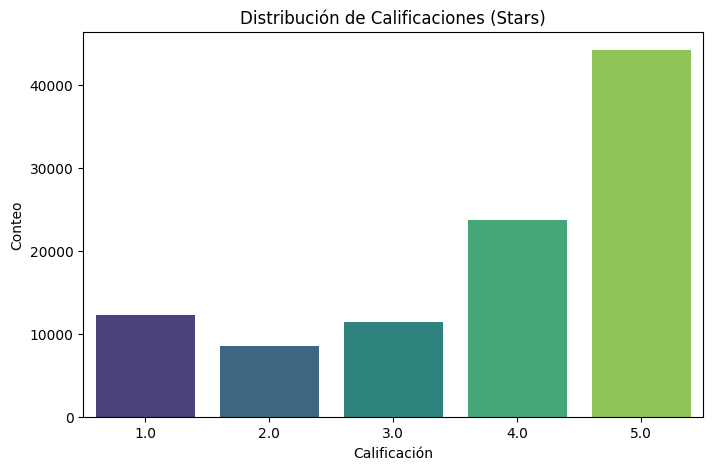

In [ ]:
# Distribución de las calificaciones
plt.figure(figsize=(8, 5))
sns.countplot(data=df_review, x='stars', palette='viridis')
plt.title('Distribución de Calificaciones (Stars)')
plt.xlabel('Calificación')
plt.ylabel('Conteo')
plt.show()

- La calificación de 5 estrellas es la más frecuente, con casi $50.000$ registros, lo que confirma una tendencia general hacia reseñas positivas.

- Hay una disminución progresiva en la cantidad de reseñas conforme disminuyen las calificaciones, con $2$ estrellas siendo la menos frecuente.

- La distribución está sesgada hacia la derecha, indicando que los usuarios tienden a otorgar calificaciones altas.

**Análisis temporal de las reseñas (`date`)**

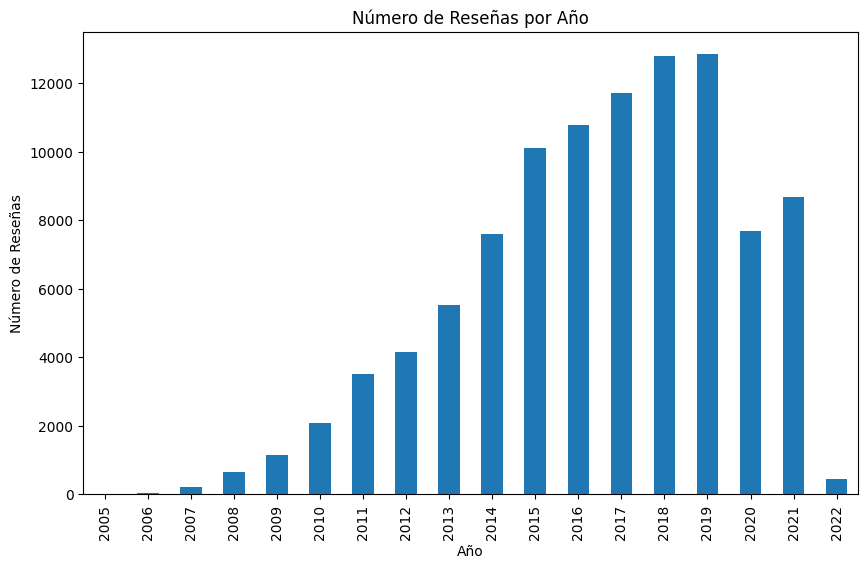

In [ ]:
# Convertir columna 'date' a formato datetime
df_review['date'] = pd.to_datetime(df_review['date'], errors='coerce')

# Reseñas por año
df_review['year'] = df_review['date'].dt.year
plt.figure(figsize=(10, 6))
df_review['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Número de Reseñas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Reseñas')
plt.show()

- Existe un crecimiento constante en el número de reseñas desde $2006$ hasta $2018$, indicando un aumento en la actividad de usuarios o la popularidad de la plataforma.

- El año $2018$ muestra el mayor número de reseñas, con más de $12,000$, lo que marca el punto más alto de participación.

- A partir de $2018$, la cantidad de reseñas comienza a disminuir gradualmente, con una caída más pronunciada en $2020$, probablemente relacionada con la pandemia y su impacto en los negocios.

- En $2021$ se observa un ligero aumento en el número de reseñas, sugiriendo una recuperación parcial de la actividad.

- En $2022$ se registra un número muy bajo de reseñas, posiblemente porque los datos del año están incompletos.

**Análisis del texto (`text`)**

**Longitud de las reseñas**

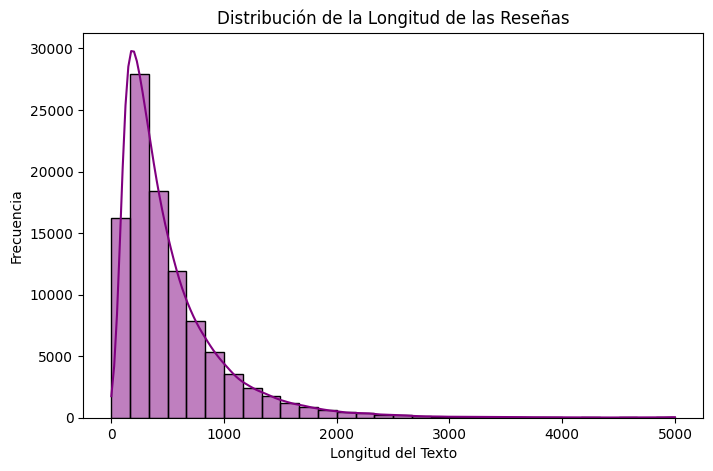

In [ ]:
# Crear columna con la longitud de texto
df_review['text_length'] = df_review['text'].apply(len)

# Distribución de la longitud del texto
plt.figure(figsize=(8, 5))
sns.histplot(df_review['text_length'], bins=30, kde=True, color='purple')
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

- La distribución tiene una forma sesgada hacia la derecha, indicando que la mayoría de las reseñas son relativamente cortas, pero hay algunas muy largas que alargan la cola derecha.

- La mayor frecuencia se encuentra en textos con una longitud inferior a $500$ caracteres, lo que indica que la mayoría de los usuarios prefieren escribir reseñas breves.

- Aunque la mayoría de las reseñas tienen menos de $1000$ caracteres, existen textos que superan los $2000$ caracteres, representando casos menos comunes.

- La curva suavizada confirma la concentración de reseñas en rangos bajos de longitud.

- La línea en el gráfico ayuda a visualizar la forma general de la distribución sin depender de los límites específicos de las barras. Si bien dichas barras muestran frecuencias absolutas (cuántas reseñas hay en cada intervalo de longitud), la línea representa una estimación continua de la probabilidad de que un valor caiga en cierto rango.

Nube de palabras

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

# Definir una función para calcular el sentimiento
def calcular_sentimiento(texto):
    if pd.isnull(texto):  # Manejar texto nulo
        return None
    polaridad = TextBlob(texto).sentiment.polarity
    if polaridad > 0:
        return 'positivo'
    elif polaridad < 0:
        return 'negativo'
    else:
        return 'neutral'

# Aplicar el análisis de sentimientos a la columna 'text'
df_review['sentimiento'] = df_review['text'].apply(calcular_sentimiento)

# Verificar la distribución de los nuevos valores en 'sentimiento'
print(df_review['sentimiento'].value_counts())

sentimiento
positivo    87474
negativo    11902
neutral       624
Name: count, dtype: int64


**Nube de palabras para reseñas positivas**

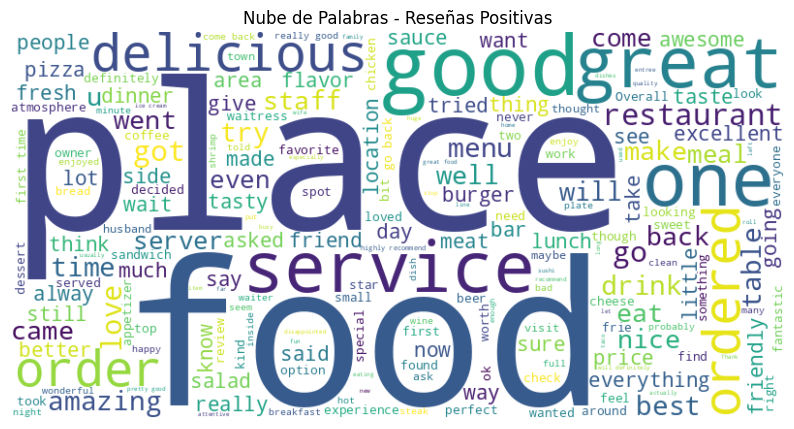

In [ ]:
# Concatenar todas las reseñas positivas en un solo texto
positive_reviews = " ".join(df_review[df_review['sentimiento'] == 'positivo']['text'].dropna())

# Generar la nube de palabras
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Nube de Palabras - Reseñas Positivas')
plt.axis('off')
plt.show()

- "place" (lugar) y "food" (comida) son las palabras más prominentes, lo que indica que los usuarios valoran mucho el lugar en sí y la calidad de la comida.
"good" (bueno) es otra palabra clave, lo que refuerza la percepción positiva general en las reseñas.

- Palabras como "service" (servicio), "friendly" (amigable) y "staff" (personal) reflejan que el trato recibido y la atención al cliente son factores destacados en las experiencias positivas.

- Se mencionan términos relacionados con alimentos y bebidas, como "drink" (bebida), "menu" (menú), "delicious" (delicioso), "ordered" (ordenado), y "pizza", lo que indica que la satisfacción con la comida y el servicio es clave para los usuarios.

- Palabras como "time" (tiempo), "lunch" (almuerzo), "dinner" (cena), y "experience" (experiencia) sugieren que las reseñas positivas están vinculadas a momentos específicos de interacción, destacando tanto la comida como el ambiente.

- Los términos "amazing" (asombroso), "great" (genial), "awesome" (increíble) y "love" (amar) reflejan el impacto emocional positivo que tienen estos lugares en los clientes.

- Palabras como "location" (ubicación) y "area" (zona) pueden indicar que los usuarios valoran no solo la calidad de los servicios, sino también el entorno donde se encuentran.

Nube de palabras para reseñas negativas

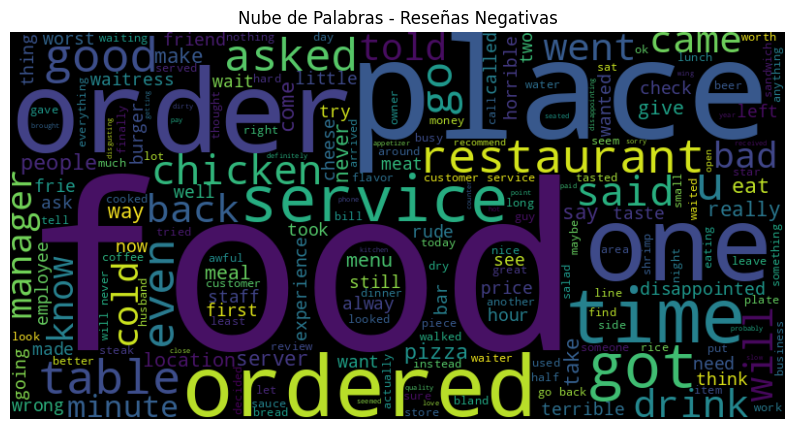

In [ ]:
# Concatenar todas las reseñas negativas en un solo texto
negative_reviews = " ".join(df_review[df_review['sentimiento'] == 'negativo']['text'].dropna())

# Generar la nube de palabras
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Nube de Palabras - Reseñas Negativas')
plt.axis('off')
plt.show()

- "place" (lugar), "order" (orden) y "food" (comida) son términos dominantes, lo que indica que los usuarios tienden a expresar frustraciones relacionadas con el establecimiento, los pedidos y la calidad de la comida. Palabras como "service" (servicio) y "time" (tiempo) también resaltan, lo que sugiere insatisfacción con la atención recibida y tiempos de espera.

- "bad" (malo), "cold" (frío), "disappointed" (decepcionado) y "horrible" reflejan experiencias negativas generales, posiblemente relacionadas con la calidad de los productos o el servicio.
"slow" (lento) y "waiting" (esperando) sugieren problemas con la rapidez del servicio.

- Palabras como "server" (mesero), "waiter" (camarero) y "manager" (gerente) aparecen con frecuencia, indicando que las interacciones con el personal son un punto de insatisfacción. Términos como "rude" (grosero) sugieren problemas con la actitud del personal.

- "hour" (hora), "minute" (minuto) y "waiting" (espera) destacan problemas relacionados con largos tiempos de atención.
"cold" (frío) puede estar relacionado con comida servida a temperaturas inadecuadas.

- Términos como "ordered" (ordenado), "wrong" (incorrecto), y "missing" (falta) sugieren que los errores en los pedidos son una queja común.
También aparecen alimentos específicos como "chicken" (pollo), "pizza", y "burger" (hamburguesa), lo que podría indicar productos con problemas recurrentes.

- Palabras como "terrible" (terrible), "awful" (horrible), y "never" (nunca) reflejan emociones intensas y experiencias que los usuarios consideran especialmente malas.


<ipython-input-78-fd06123a1823>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_review, x='sentimiento', palette='coolwarm')


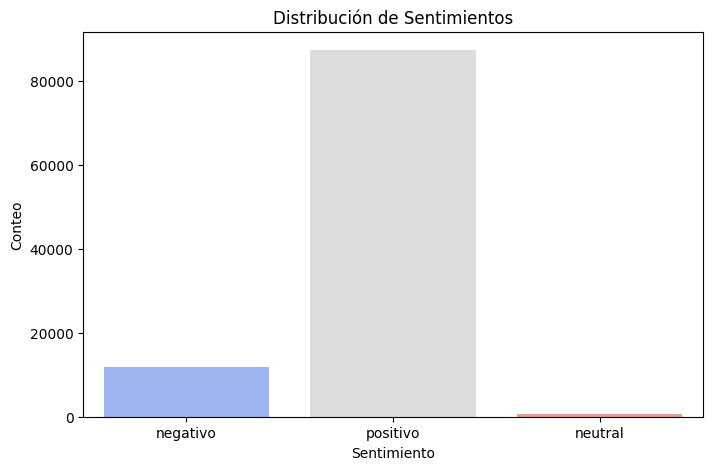

In [ ]:
# Distribución de sentimiento
plt.figure(figsize=(8, 5))
sns.countplot(data=df_review, x='sentimiento', palette='coolwarm')
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Conteo')
plt.show()

- La mayoría de las reseñas están clasificadas como positivas, con un conteo superior a $80.000$. Esto indica que los usuarios suelen tener experiencias favorables.

- Las reseñas con sentimientos negativos son mucho menos frecuentes, con menos de $15.000$ registros, estas representan una proporción mucho menor, aunque sigue siendo notable

- Las reseñas neutrales son extremadamente raras, prácticamente insignificantes en comparación con los otros dos sentimientos. Esto sugiere que los usuarios tienden a tener opiniones más definidas, ya sea positivas o negativas.

##**3.5. Tabla `review_estados`**

In [ ]:
# Información general del DataFrame
print(df_reviews_estados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   gmap_id      200000 non-null  object 
 1   rating       200000 non-null  Int64  
 2   text         200000 non-null  object 
 3   time         200000 non-null  Int64  
 4   name         200000 non-null  object 
 5   user_id      200000 non-null  float64
 6   estado       200000 non-null  object 
 7   sentimiento  0 non-null       float64
dtypes: Int64(2), float64(2), object(4)
memory usage: 12.6+ MB
None


In [ ]:
# Estadísticas descriptivas para columnas numéricas
print(df_reviews_estados.describe())

         rating                  time       user_id  sentimiento
count  200000.0              200000.0  2.000000e+05          0.0
mean    4.24234  1554960634794.439941  1.093023e+20          NaN
std    1.077978    37747644687.977585  5.276318e+18          NaN
min         1.0       1443470285000.0  1.000003e+20          NaN
25%         4.0       1529073301250.0  1.047518e+20          NaN
50%         5.0       1556156566000.0  1.092988e+20          NaN
75%         5.0       1580015441000.0  1.138510e+20          NaN
max         5.0       1630901834000.0  1.184467e+20          NaN


**Columna `rating`**

- Tiene un promedio de $4.21$ con un mínimo de $1.0$ y un máximo de $5.0$. La media está sesgada hacia calificaciones altas, y la mediana siendo 5 confirma que más de la mitad de las calificaciones son perfectas.

- La desviación estándar es $1.088$ lo que indica una dispersión moderada en las calificaciones. Aunque muchas calificaciones son altas, todavía hay cierta variación.

In [ ]:
# Valores únicos por columna
for col in df_reviews_estados.columns:
    print(f"Valores únicos en '{col}': {df_reviews_estados[col].nunique()}")

# Verificar valores nulos
print(df_reviews_estados.isnull().sum())

# Verificar duplicados
print(f"Duplicados: {df_reviews_estados.duplicated().sum()}")

Valores únicos en 'gmap_id': 3088
Valores únicos en 'rating': 5
Valores únicos en 'text': 106451
Valores únicos en 'time': 199754
Valores únicos en 'name': 110512
Valores únicos en 'user_id': 115614
Valores únicos en 'estado': 7
Valores únicos en 'sentimiento': 0
gmap_id             0
rating              0
text                0
time                0
name                0
user_id             0
estado              0
sentimiento    200000
dtype: int64
Duplicados: 0


Se crean categorías como "Positivo", "Negativo" y "Neutral" según el análisis del texto.

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positivo"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negativo"

df_reviews_estados['sentimiento'] = df_reviews_estados['text'].apply(get_sentiment)

Análisis de reseñas por estado (`estado`)

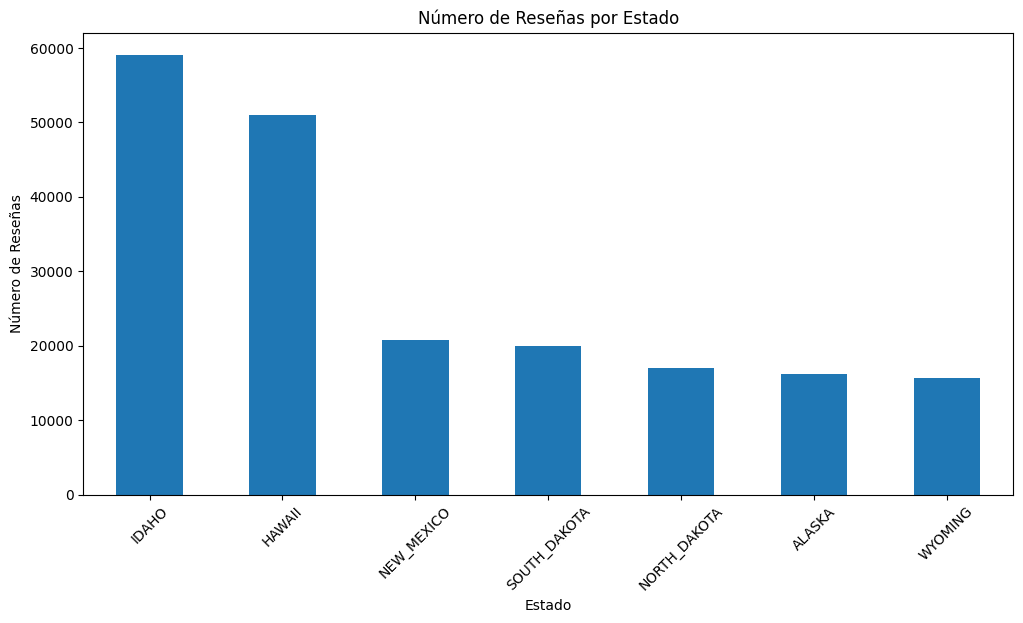

In [ ]:
# Reseñas por estado
plt.figure(figsize=(12, 6))
df_reviews_estados['estado'].value_counts().plot(kind='bar')
plt.title('Número de Reseñas por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=45)
plt.show()

- Debido a las restricciones de memoria RAM en Colab, solo se incluyó una muestra de estados en este gráfico, lo que puede influir en la percepción general de los datos.

- Idaho y Hawaii lideran en el número de reseñas, con más de $50,000$ registros cada uno, siendo los estados con mayor representación en este gráfico.
Los otros estados tienen una cantidad considerablemente menor de reseñas, con valores en el rango de $10,000$ a $20,000$ aproximadamente, lo que sugiere una distribución desigual.

- District of Columbia tiene significativamente menos reseñas que los demás estados, lo que podría reflejar una menor actividad en plataformas de reseñas para este estado.

- La selección de estados puede no ser proporcional a su actividad real en las plataformas de reseñas debido a la limitación de memoria. Es importante considerar que los resultados obtenidos podrían cambiar si se incluyera el total de los datos.

##**3.6. Tabla `Tip`**

In [ ]:
# Información general del DataFrame
print(df_tip.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718740 entries, 0 to 718739
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   date              718740 non-null  datetime64[us, UTC]
 1   text              718740 non-null  object             
 2   compliment_count  718740 non-null  Int64              
 3   business_id       718740 non-null  object             
 4   user_id           718740 non-null  object             
dtypes: Int64(1), datetime64[us, UTC](1), object(3)
memory usage: 28.1+ MB
None


In [ ]:
# Descripción estadística de las columnas numéricas
print(df_tip.describe())


       compliment_count
count          718740.0
mean           0.012313
std            0.119333
min                 0.0
25%                 0.0
50%                 0.0
75%                 0.0
max                 6.0


- Hay $718,740$ registros en la columna `compliment_count` .

- El valor promedio de `compliment_count` es de $0.012$, lo que indica que la mayoría de los registros tienen pocos o ningún cumplido asociado.

- La desviación estándar es $0.119$, lo que significa que los valores no varían mucho alrededor de la media, confirmando que los cumplidos son raros.

- El valor mínimo es 0, indicando que hay muchos registros sin sugerencias.

- El 75% sigue siendo $0$, lo que implica que un alto porcentaje de registros no tienen cumplidos.

- El valor máximo observado es $6$, lo que indica que, aunque poco comunes, hay registros con hasta $6$ cumplidos.

In [ ]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df_tip.isnull().sum())

Valores nulos por columna:
date                0
text                0
compliment_count    0
business_id         0
user_id             0
dtype: int64


**Distribución temporal de los datos**

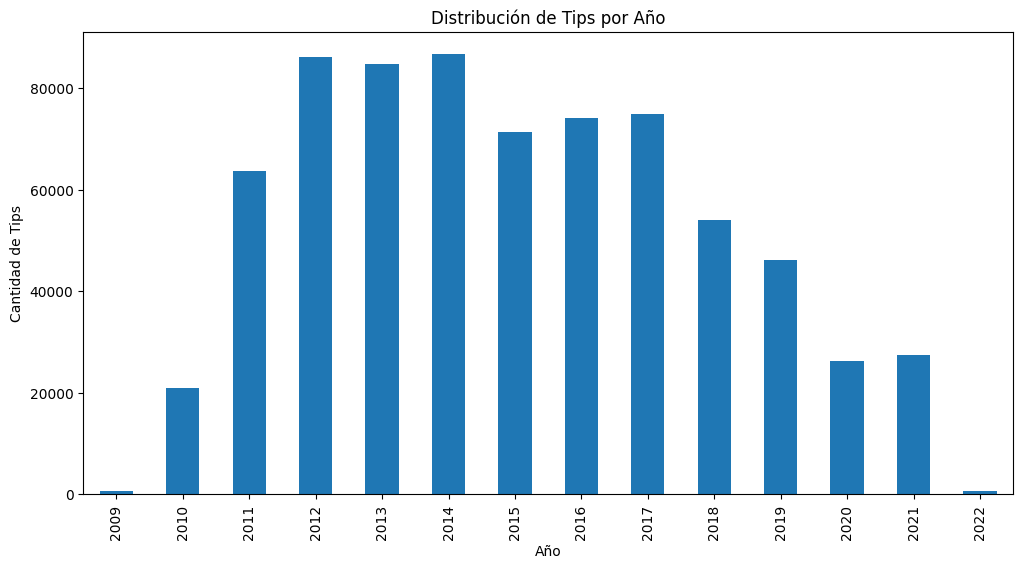

In [ ]:
# Convertir 'date' a formato datetime
df_tip['date'] = pd.to_datetime(df_tip['date'])

# Histogramas de la distribución temporal
plt.figure(figsize=(12, 6))
df_tip['date'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Tips por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Tips')
plt.show()

- El período comprendido entre $2012$ y $2017$ presenta el mayor número de tips, alcanzando su punto más alto en estos años. Esto podría estar relacionado con un aumento en la popularidad de la plataforma o el sistema donde los tips fueron registrados, o un incremento en la participación de usuarios activos.

- Desde $2009$ hasta $2012$, hay un crecimiento notable en la cantidad de tips por año. Esto sugiere una fase de adopción inicial, donde la plataforma empezó a ganar tracción entre los usuarios.

- A partir de $2018$, se observa una disminución progresiva en el número de tips registrados. Esto podría deberse a diversos factores, como:

  - Cambios en la dinámica de uso de la plataforma.
  - Competencia de otras plataformas o tecnologías.
  - Cambios en el comportamiento de los usuarios.

- En los años $2020$ y $2021$, se mantiene una tendencia descendente en la cantidad de tips. Esto podría estar relacionado con el impacto de la pandemia de COVID-19, que redujo la actividad presencial en negocios y, posiblemente, la interacción en este contexto.

- En los extremos ($2009$ y $2022$), los registros son mínimos, probablemente porque:

  - En 2009, la plataforma estaba en sus primeras etapas de desarrollo.
  - En 2022, los datos del año podrían estar incompletos o representan un cambio en la dinámica de registro.

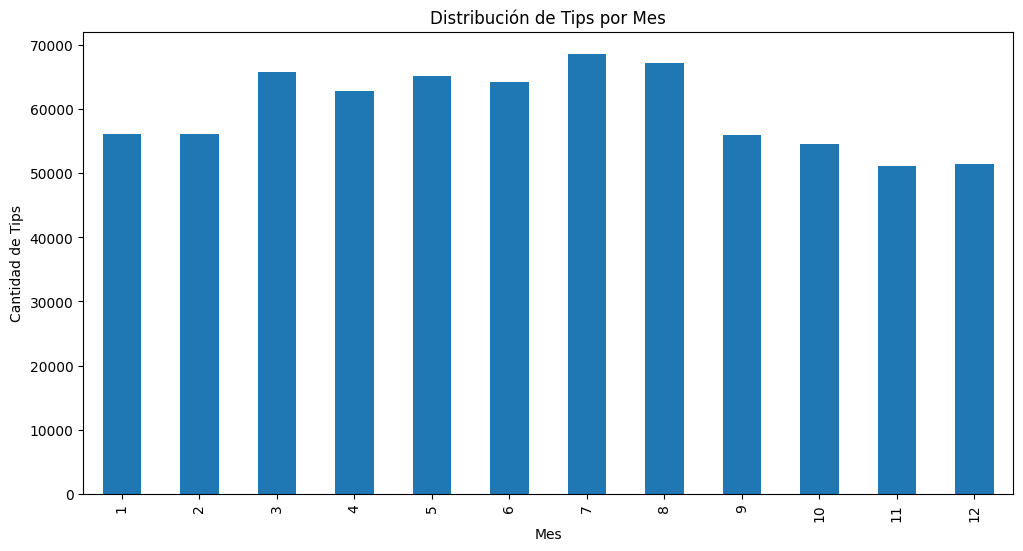

In [ ]:
# Análisis mensual
plt.figure(figsize=(12, 6))
df_tip['date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Tips por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Tips')
plt.show()

- Los meses de julio y agosto muestran los valores más altos, superando los $70,000$ tips. Esto podría estar relacionado con períodos de mayor actividad social, como vacaciones o eventos específicos en estos meses, dependiendo del contexto geográfico o cultural de los datos.

- Aunque no hay una variación drástica, se observa un ligero patrón estacional. Los meses de verano (junio, julio, agosto) tienen más actividad, mientras que hacia el final del año (noviembre y diciembre), la cantidad de tips disminuye.

- Los meses de enero y febrero presentan los valores más bajos, con menos de $60,000$ tips. Esto podría deberse a un inicio lento del año en términos de actividad social o comercial.

- En general, los datos presentan una distribución bastante uniforme a lo largo del año, con diferencias no demasiado significativas entre los meses (menos de $20,000$ tips de diferencia entre los extremos).

**Análisis de las columnas textuales**

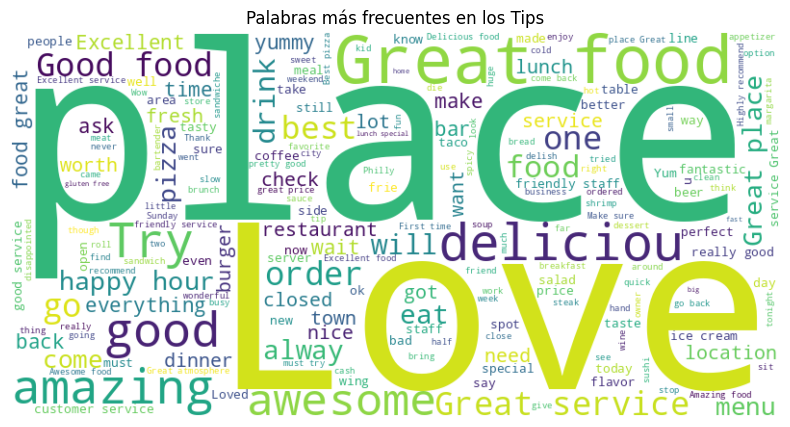

In [ ]:
# WordCloud de las palabras en la columna 'text'
text_data = ' '.join(df_tip['text'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más frecuentes en los Tips')
plt.show()

- Las palabras "place", "love", "great", y "food" son las más grandes y llamativas, lo que indica que son las más utilizadas en los tips. Esto sugiere que los usuarios tienden a describir sus experiencias relacionadas con un lugar (place) y mencionan frecuentemente términos positivos como "love" (amor), "great" (genial) y "food" (comida).

- Palabras como "amazing", "awesome", "delicious", "excellent" y "happy" destacan un enfoque en la satisfacción y el disfrute. Esto sugiere que los tips se utilizan principalmente para compartir experiencias positivas.

- Además de la comida ("food"), los usuarios también mencionan servicios ("service") y bebidas ("drink"), lo que indica que evalúan tanto la calidad de los productos ofrecidos como la atención recibida. Términos como "order", "menu", y "location" reflejan aspectos específicos de la experiencia que los usuarios consideran relevantes.

- Algunas palabras como "pizza", "burger", y "ice cream" sugieren que ciertos alimentos específicos son recurrentemente mencionados en los tips. También se ven palabras relacionadas con acciones como "try" (intentar), "come" (venir) y "go" (ir), lo que podría estar relacionado con recomendaciones o invitaciones a visitar el lugar.

- El predominio de palabras con connotación positiva refuerza que el tono general de los tips es favorable, destacando experiencias agradables y productos o servicios recomendados.

**Insights sobre longitud de los tips**

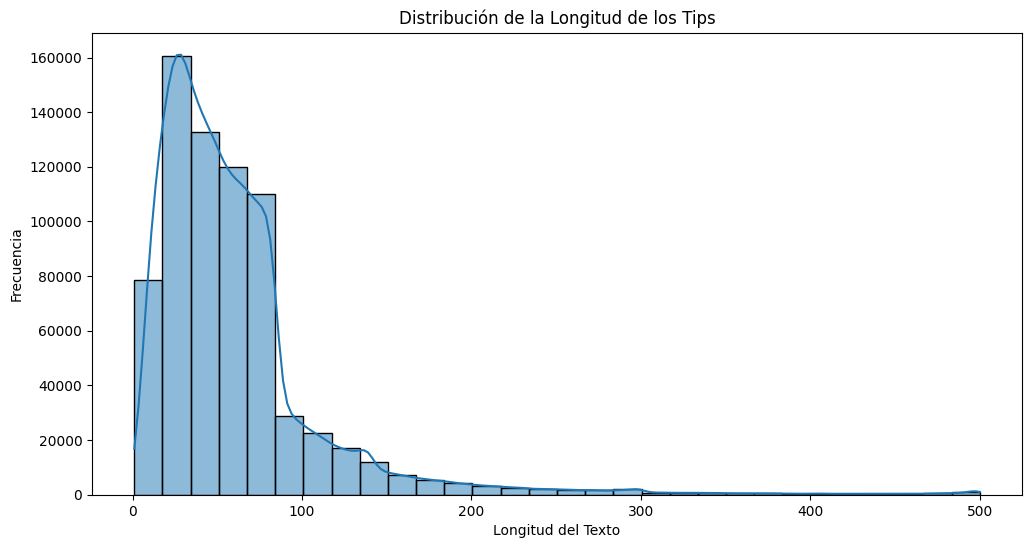

In [ ]:
# Agregar columna de longitud del texto
df_tip['text_length'] = df_tip['text'].astype(str).apply(len)

# Distribución de la longitud de los textos
plt.figure(figsize=(12, 6))
sns.histplot(df_tip['text_length'], bins=30, kde=True)
plt.title('Distribución de la Longitud de los Tips')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()

- La mayor cantidad de tips tiene una longitud menor a $100$ caracteres, con un pico alrededor de los $50-60$ caracteres.
Esto indica que los usuarios tienden a escribir mensajes breves en sus tips.

- Aunque es menos frecuente, hay tips que alcanzan hasta los $500$ caracteres. La frecuencia de textos largos disminuye rápidamente, mostrando que estos son menos comunes.

- La mayoría de los tips se concentran en longitudes relativamente cortas, probablemente porque los tips son diseñados para ser mensajes rápidos y fáciles de leer.

- A pesar de la tendencia hacia textos cortos, la presencia de una cola larga muestra que algunos usuarios optan por expresar ideas más detalladas y extensas.

- Los textos cortos podrían estar asociados a afirmaciones simples o recomendaciones específicas (e.g., “Great place!”), mientras que los textos más largos podrían incluir reseñas detalladas o explicaciones.

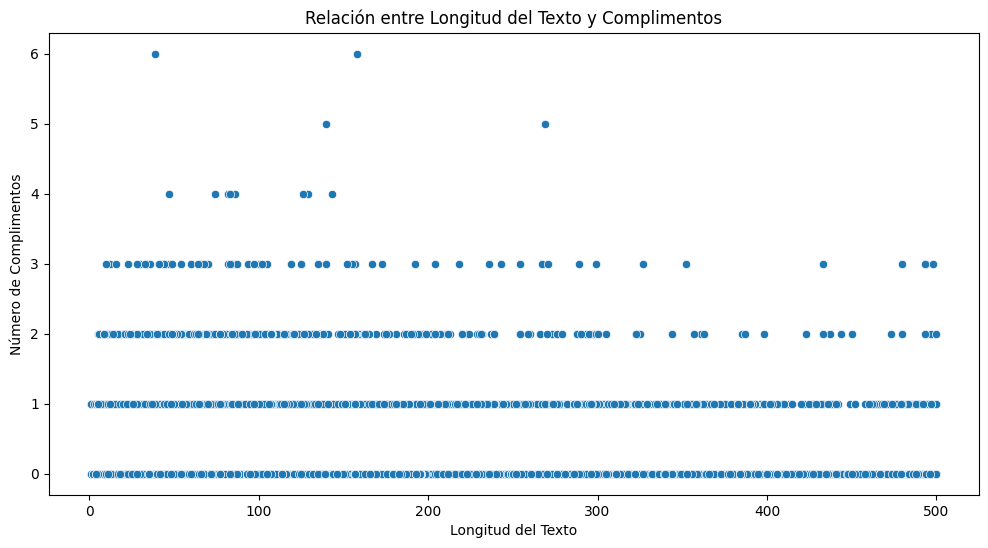

In [ ]:
# Relación entre longitud del texto y cumplidos
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_tip, x='text_length', y='compliment_count')
plt.title('Relación entre Longitud del Texto y Complimentos')
plt.xlabel('Longitud del Texto')
plt.ylabel('Número de Complimentos')
plt.show()

- La mayoría de los tips tienen 0 cumplidos, independientemente de la longitud del texto. Esto se refleja en una densa acumulación de puntos en el eje de los cumplidos igual a $0$. También hay una menor cantidad de tips con $1$ o $2$ cumplidos, distribuidos a lo largo de varias longitudes.

- Para tips que reciben $1$ o más cumplidos, la longitud del texto varía desde textos muy cortos (menos de $50$ caracteres) hasta textos largos (cerca de $500$ caracteres). Esto indica que la longitud del texto no es un factor determinante único para recibir cumplidos.

- Los tips con $5$ o $6$ cumplidos son muy pocos y parecen estar distribuidos en textos más largos, aunque no exclusivamente. Esto podría sugerir que los textos más largos tienen un leve aumento en la probabilidad de recibir más cumplidos, pero no es una tendencia sólida.

- No se observa una relación directa o lineal entre la longitud del texto y el número de cumplidos. Los cumplidos parecen depender de otros factores además de la longitud del texto.